In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [47]:
df1= pd.read_csv(r"F:\data\data.csv")

In [48]:
df1.head()

filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   
1 -233.860772  ...  -2.250578   3.959198  5.322555  0.812028 -1.107202   
2 -221.802549  ... -13.037723 -12.652228 -1.821905 -7.260097 -6.660252   
3 -207.208080  ...  -0.613248   0.384877  2.605128 -5.188924 -9.527455   
4 -145.434568  ...   7.457218 -10.470444 -2.360483 -6.783623  2.671134   

      mfcc17     mfcc18     mfcc19     mfcc20  label  
0  -6.829571   0.965922  -7.570825   2.918987  blues  
1  -4.556555  -2.436490   3.316913  -0.608485  blues  
2 -14.682694 -11.719264 -11.025216 -13.387260  blues  
3  -9.244394  -2.848274  -1.418707  -5.932607  blues  
4  -4.760879  -0.949005   0.024832  -2.005315  blues  

[5 rows x 30 columns]

In [49]:
df2= pd.read_csv(r"F:\data\data_2genre.csv")

In [50]:
df2.head()

filename       tempo  beats  chroma_stft      rmse  spectral_centroid  \
0  pop.00024.au  117.453835     57     0.410990  0.207584        3301.781785   
1  pop.00099.au   78.302557     38     0.360462  0.138195        2765.747194   
2  pop.00009.au  107.666016     50     0.454810  0.159711        3279.877315   
3  pop.00078.au  103.359375     52     0.454698  0.223419        3124.176350   
4  pop.00037.au  103.359375     51     0.451668  0.240985        3236.413205   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  ...  \
0         3175.656592  7302.597509            0.144527  -40.802069  ...   
1         3222.713605  6873.391771            0.096015 -119.320605  ...   
2         3026.391118  6953.099622            0.172819  -35.277026  ...   
3         2970.320532  6618.134981            0.142721  -42.757179  ...   
4         2953.596262  6698.776160            0.164825    4.821123  ...   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0 -0.568772  0.552448 -1.981371  1.915755  0.076505 -1.270496  1.233082   
1  1.566938 -2.932391 -1.609138 -0.200545 -2.429376  1.207988  5.848729   
2 -0.518891  0.212918 -1.294660 -0.105626 -1.245879 -2.528455  0.571032   
3  3.020176 -1.242321 -3.524069 -0.325165 -1.443294 -1.864617 -0.031307   
4  1.753352  3.336132  2.352307  1.428845 -0.604926 -2.185691 -1.602394   

     mfcc19    mfcc20  label  
0  1.493700  0.949931      1  
1  1.609469  7.580263      1  
2  1.569434 -1.724873      1  
3 -0.729631 -0.987611      1  
4 -0.612146 -4.050126      1  

[5 rows x 30 columns]

In [59]:
df2['label'] = df2['label'].map({1:'pop',2:'classical'})
df2['label']

0            pop
1            pop
2            pop
3            pop
4            pop
         ...    
195    classical
196    classical
197    classical
198    classical
199    classical
Name: label, Length: 200, dtype: object

In [33]:
df2['label'].unique()

array(['pop', 'classical'], dtype=object)

In [34]:
df1['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

array([[<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'beats'}>,
        <AxesSubplot:title={'center':'chroma_stft'}>],
       [<AxesSubplot:title={'center':'rmse'}>,
        <AxesSubplot:title={'center':'spectral_centroid'}>,
        <AxesSubplot:title={'center':'spectral_bandwidth'}>],
       [<AxesSubplot:title={'center':'rolloff'}>,
        <AxesSubplot:title={'center':'zero_crossing_rate'}>,
        <AxesSubplot:title={'center':'mfcc1'}>],
       [<AxesSubplot:title={'center':'mfcc2'}>,
        <AxesSubplot:title={'center':'mfcc3'}>,
        <AxesSubplot:title={'center':'mfcc4'}>],
       [<AxesSubplot:title={'center':'mfcc5'}>,
        <AxesSubplot:title={'center':'mfcc6'}>,
        <AxesSubplot:title={'center':'mfcc7'}>],
       [<AxesSubplot:title={'center':'mfcc8'}>,
        <AxesSubplot:title={'center':'mfcc9'}>,
        <AxesSubplot:title={'center':'mfcc10'}>],
       [<AxesSubplot:title={'center':'mfcc11'}>,
        <AxesSubplot:title={'center

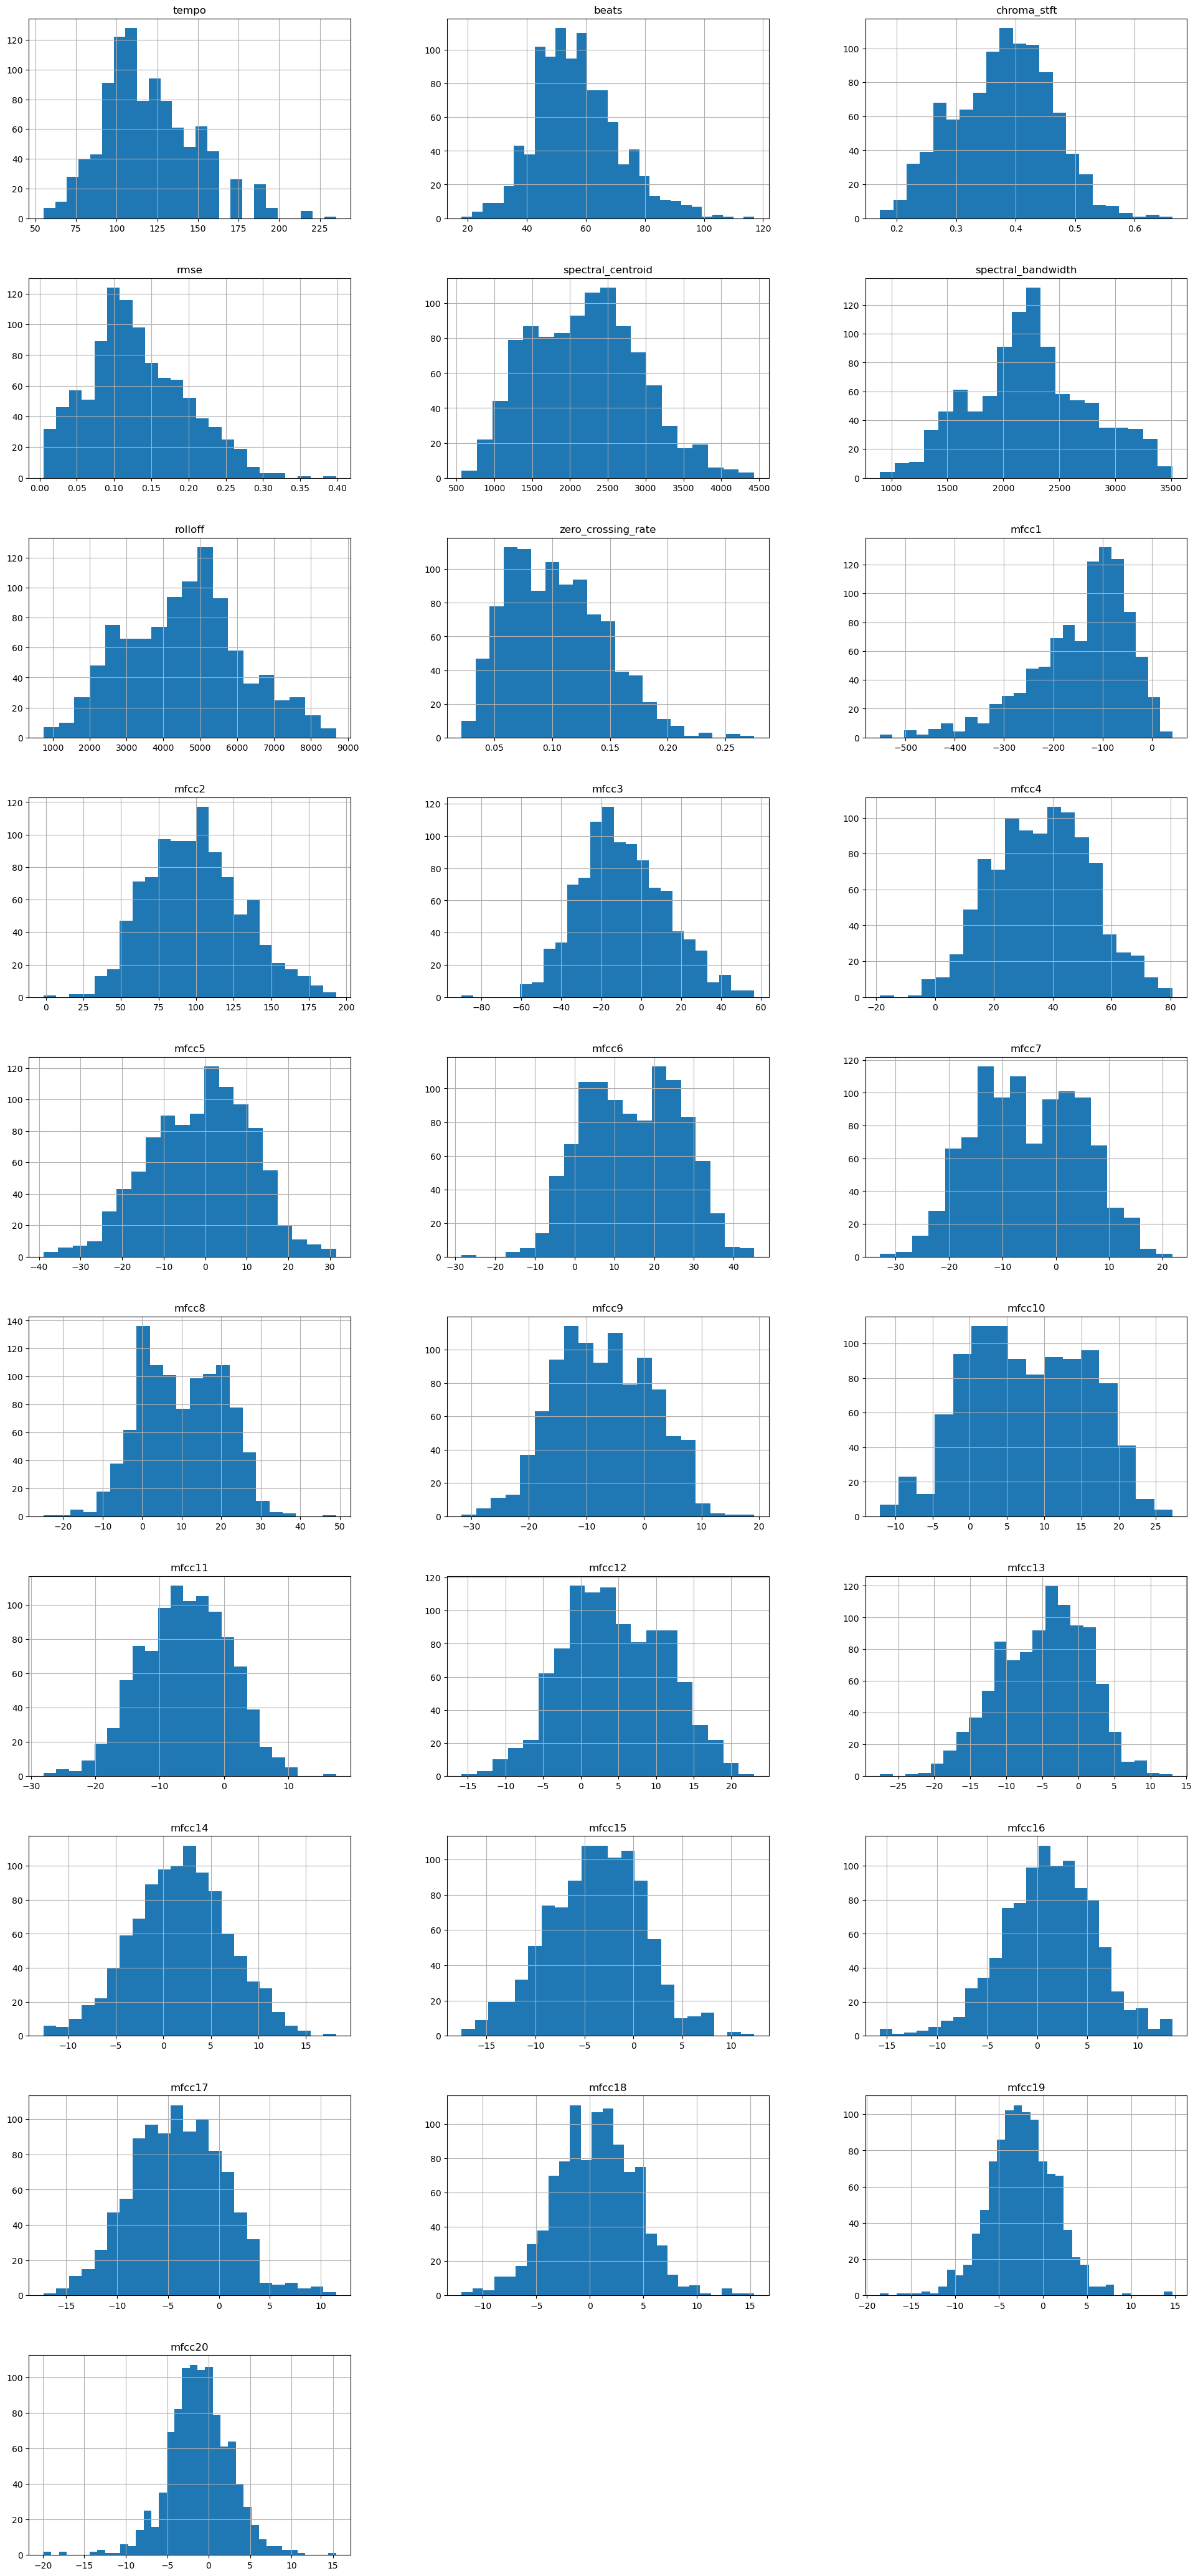

In [35]:
df1.hist(bins='auto', layout=(15,3), figsize=(24,80))

In [15]:
 df1.duplicated().sum()

0

In [16]:
df1.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [17]:
df1.dropna(inplace=True)
df1.shape

(1000, 30)

In [18]:
df1.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [19]:
col1=['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate']

In [20]:
col2=['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20']

In [21]:
df_col1 = df1[col1]
df_col1.head()

filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  
0        2116.942959         1956.611056  4196.107960            0.127272  
1        1156.070496         1497.668176  2170.053545            0.058613  
2        1331.073970         1973.643437  2900.174130            0.042967  
3        1361.045467         1567.804596  2739.625101            0.069124  
4        1811.076084         2052.332563  3927.809582            0.075480

In [22]:
df_col2 = df1[col2]
df_col2.head()

mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  \
0  -26.929785  107.334008 -46.809993  40.932634 -21.463776  24.816275   
1 -233.860772  136.170239   3.289490  48.931193   8.699106  13.954752   
2 -221.802549  110.843070  18.620984  30.922996   3.291330  22.587447   
3 -207.208080  132.799175 -15.438986  60.986727   0.725807  12.437828   
4 -145.434568  102.829023 -12.517677  56.993472   2.271347  26.591402   

       mfcc7      mfcc8      mfcc9     mfcc10     mfcc11     mfcc12  \
0 -18.945571  15.253459 -15.050104  12.262823 -15.234050  14.336612   
1   5.359449   0.381334 -13.490265  16.871769   5.145258  -2.250578   
2 -20.418303  12.120995 -26.347956  -4.356270 -26.406674 -13.037723   
3   1.183836  -1.540779 -17.888154   8.358496  -2.452068  -0.613248   
4  -4.274803  17.338809  -7.985593  15.235427  -6.934599   7.457218   

      mfcc13    mfcc14    mfcc15    mfcc16     mfcc17     mfcc18     mfcc19  \
0 -13.821769  7.562789 -6.181372  0.330165  -6.829571   0.965922  -7.570825   
1   3.959198  5.322555  0.812028 -1.107202  -4.556555  -2.436490   3.316913   
2 -12.652228 -1.821905 -7.260097 -6.660252 -14.682694 -11.719264 -11.025216   
3   0.384877  2.605128 -5.188924 -9.527455  -9.244394  -2.848274  -1.418707   
4 -10.470444 -2.360483 -6.783623  2.671134  -4.760879  -0.949005   0.024832   

      mfcc20  
0   2.918987  
1  -0.608485  
2 -13.387260  
3  -5.932607  
4  -2.005315

<AxesSubplot:>

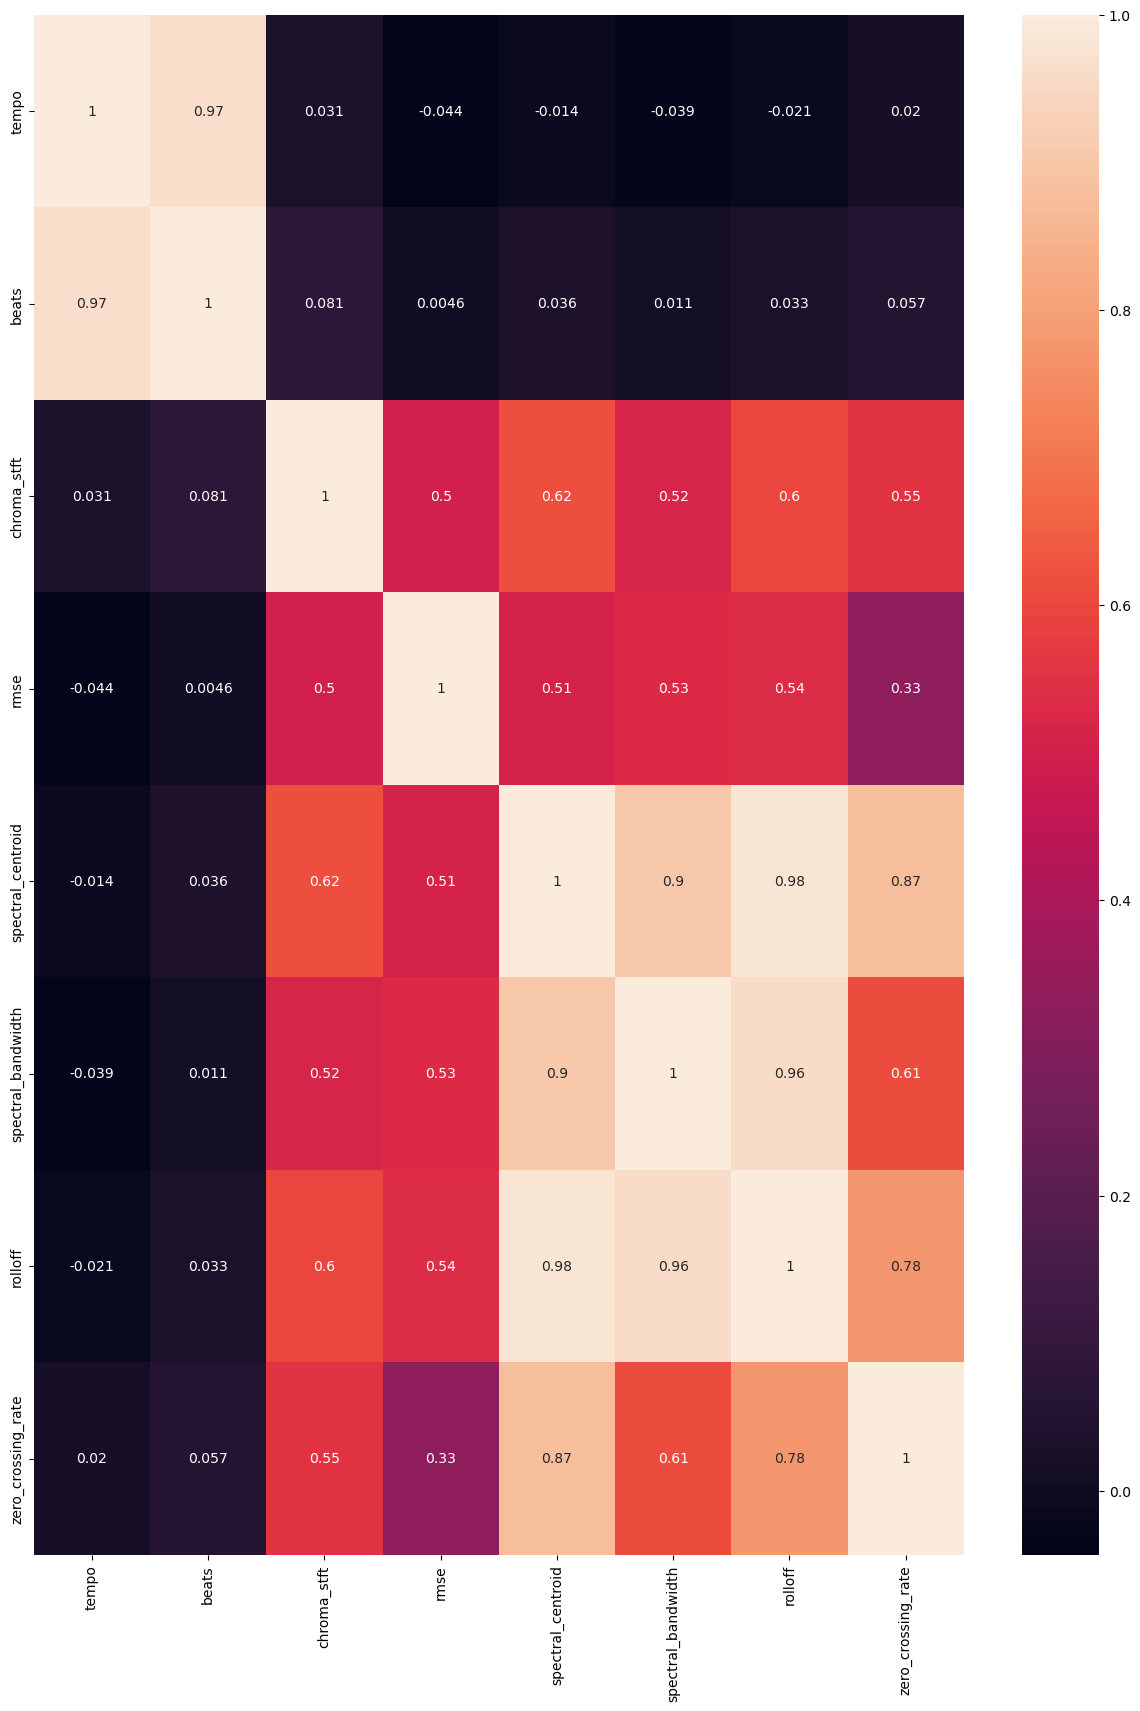

In [42]:
plt.figure(figsize=(15,20))
sns.heatmap(df_col1.corr(),annot=True)

<AxesSubplot:>

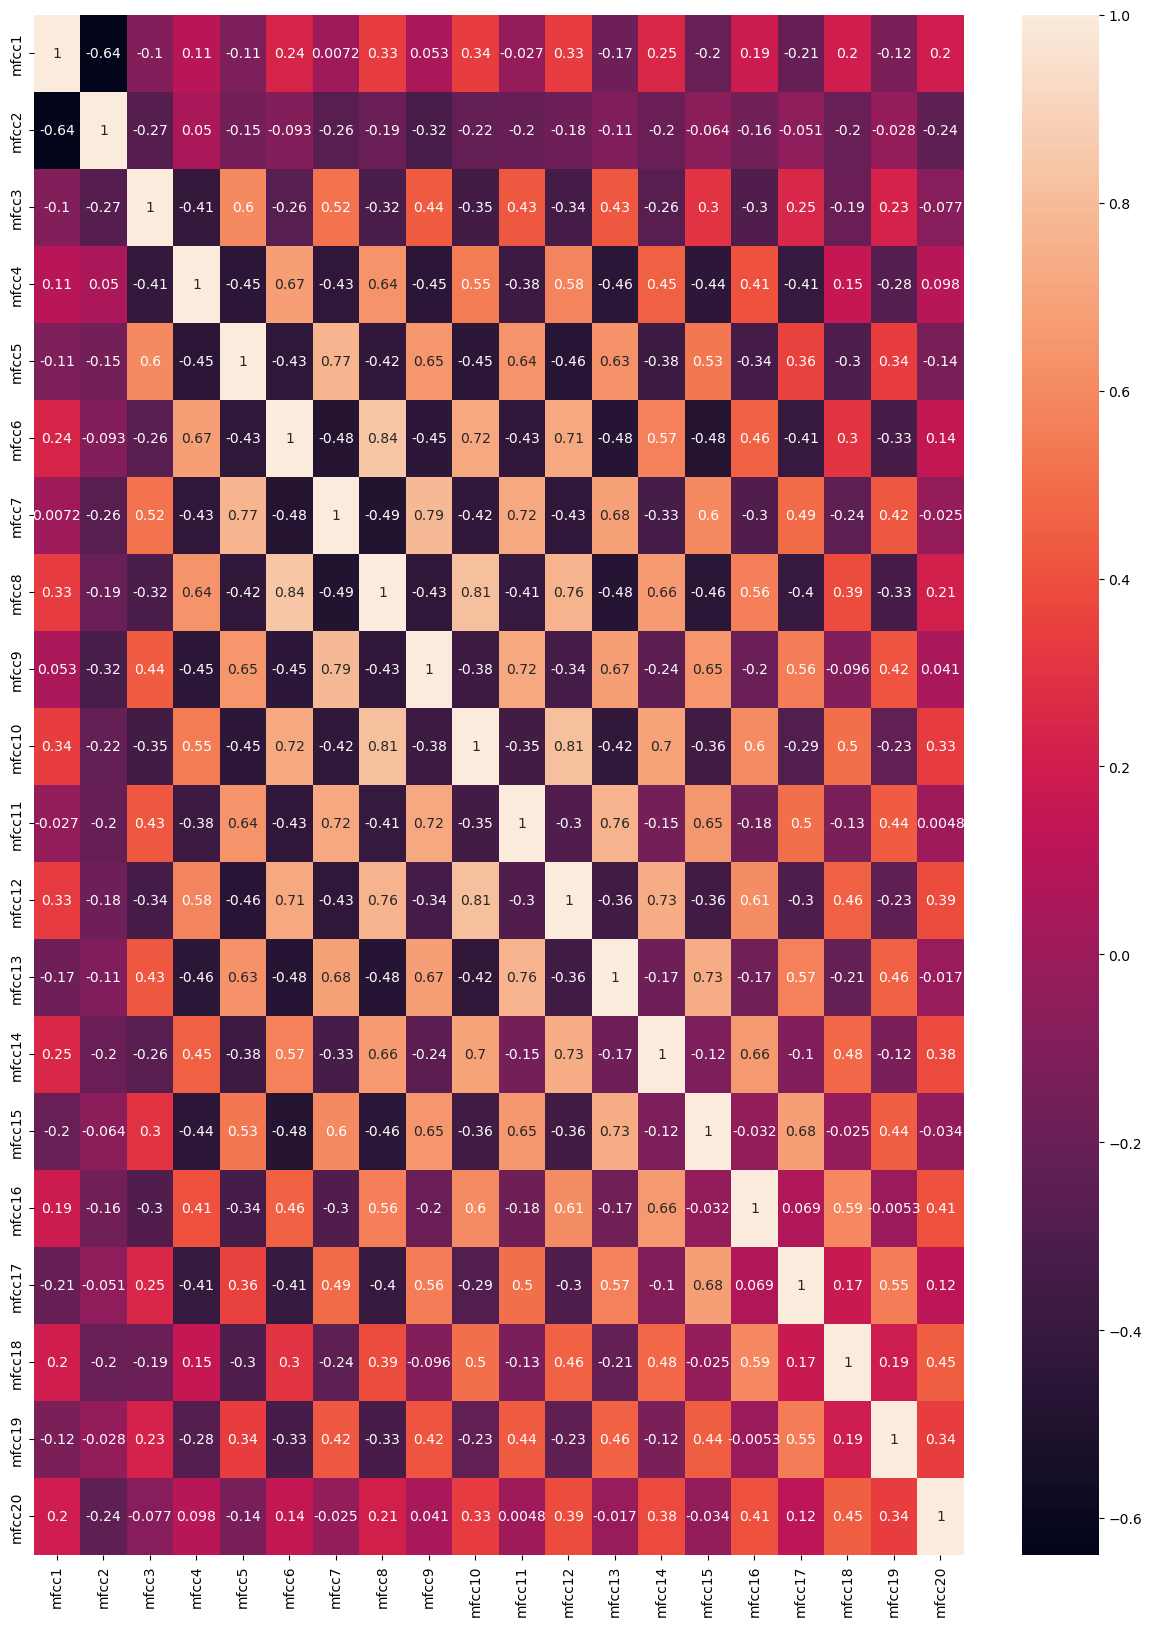

In [45]:
plt.figure(figsize=(15,20))
sns.heatmap(df_col2.corr(),annot=True)

<AxesSubplot:ylabel='label'>

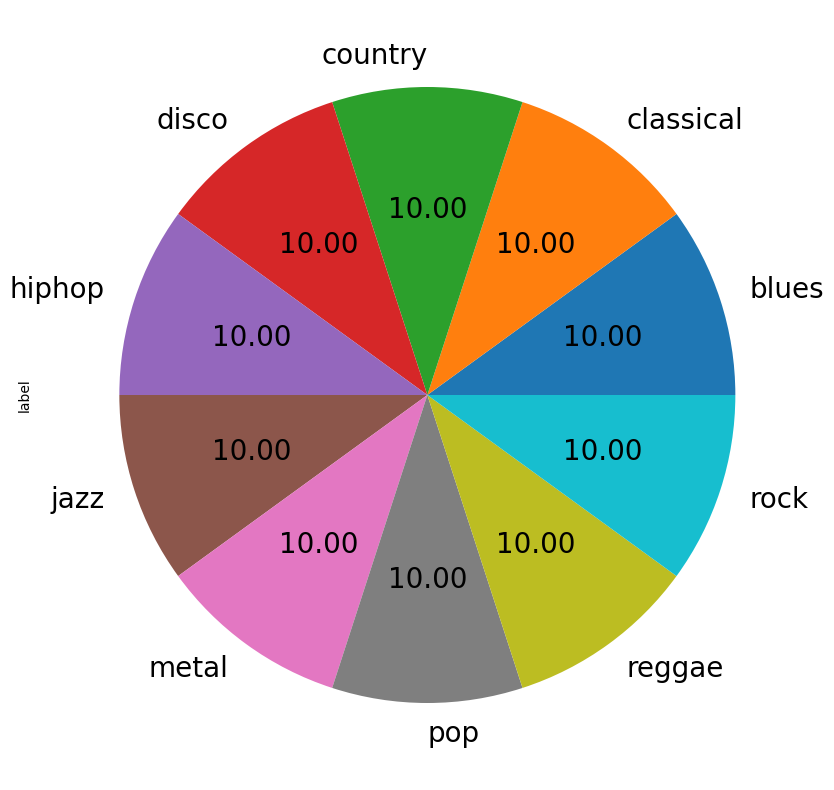

In [46]:
df1["label"].value_counts().plot.pie( autopct='%.2f', figsize=(10, 10),fontsize=20)

['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


C:\Users\HP\AppData\Local\Temp\ipykernel_4368\2753850356.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,10))


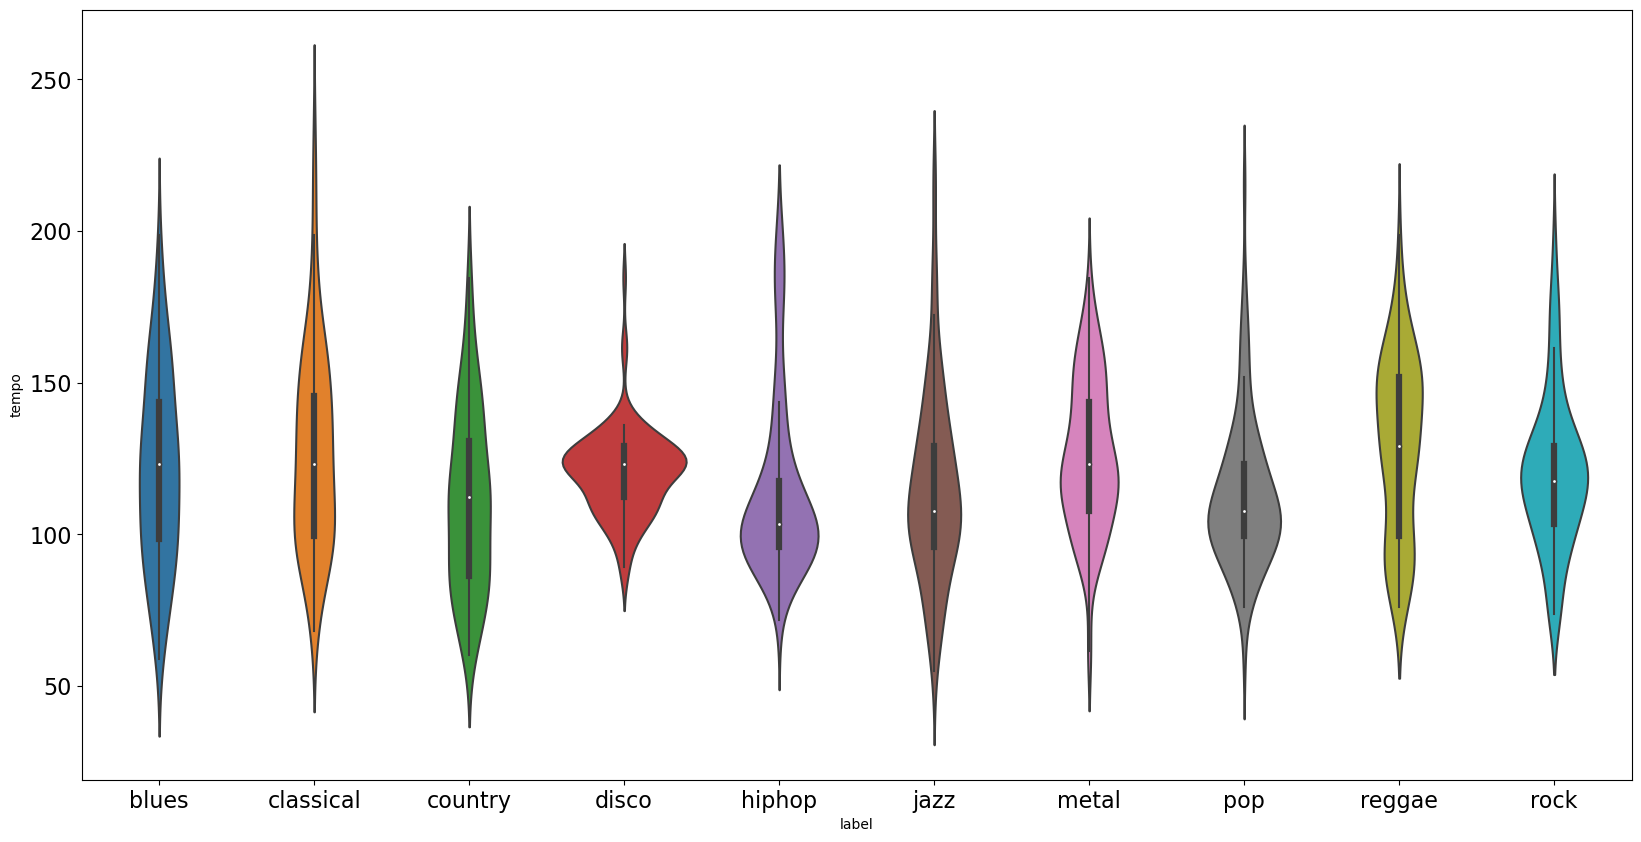

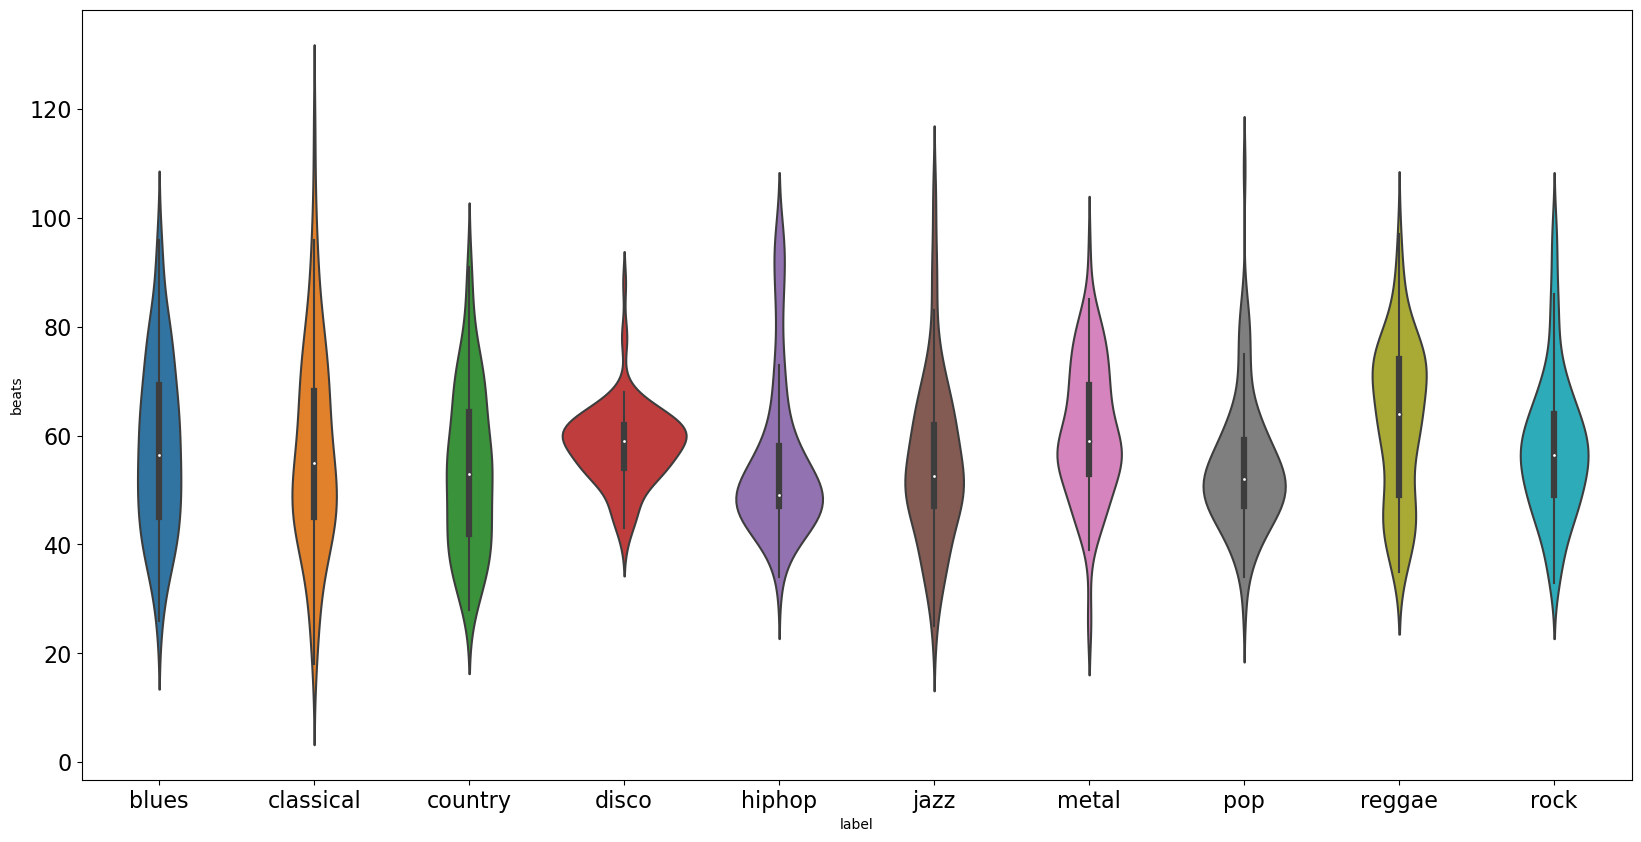

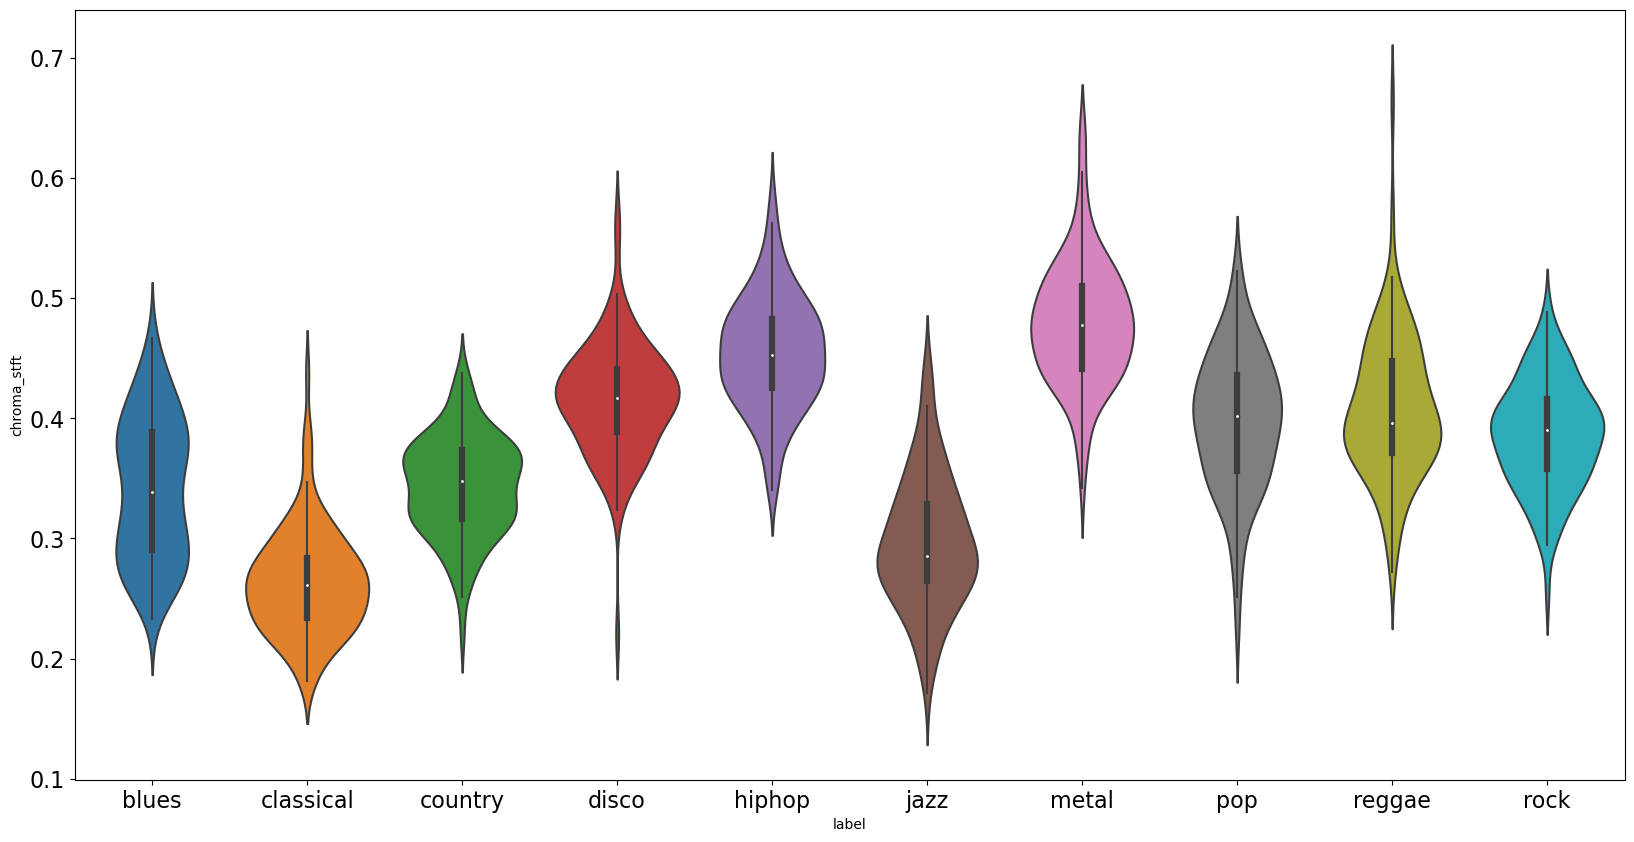

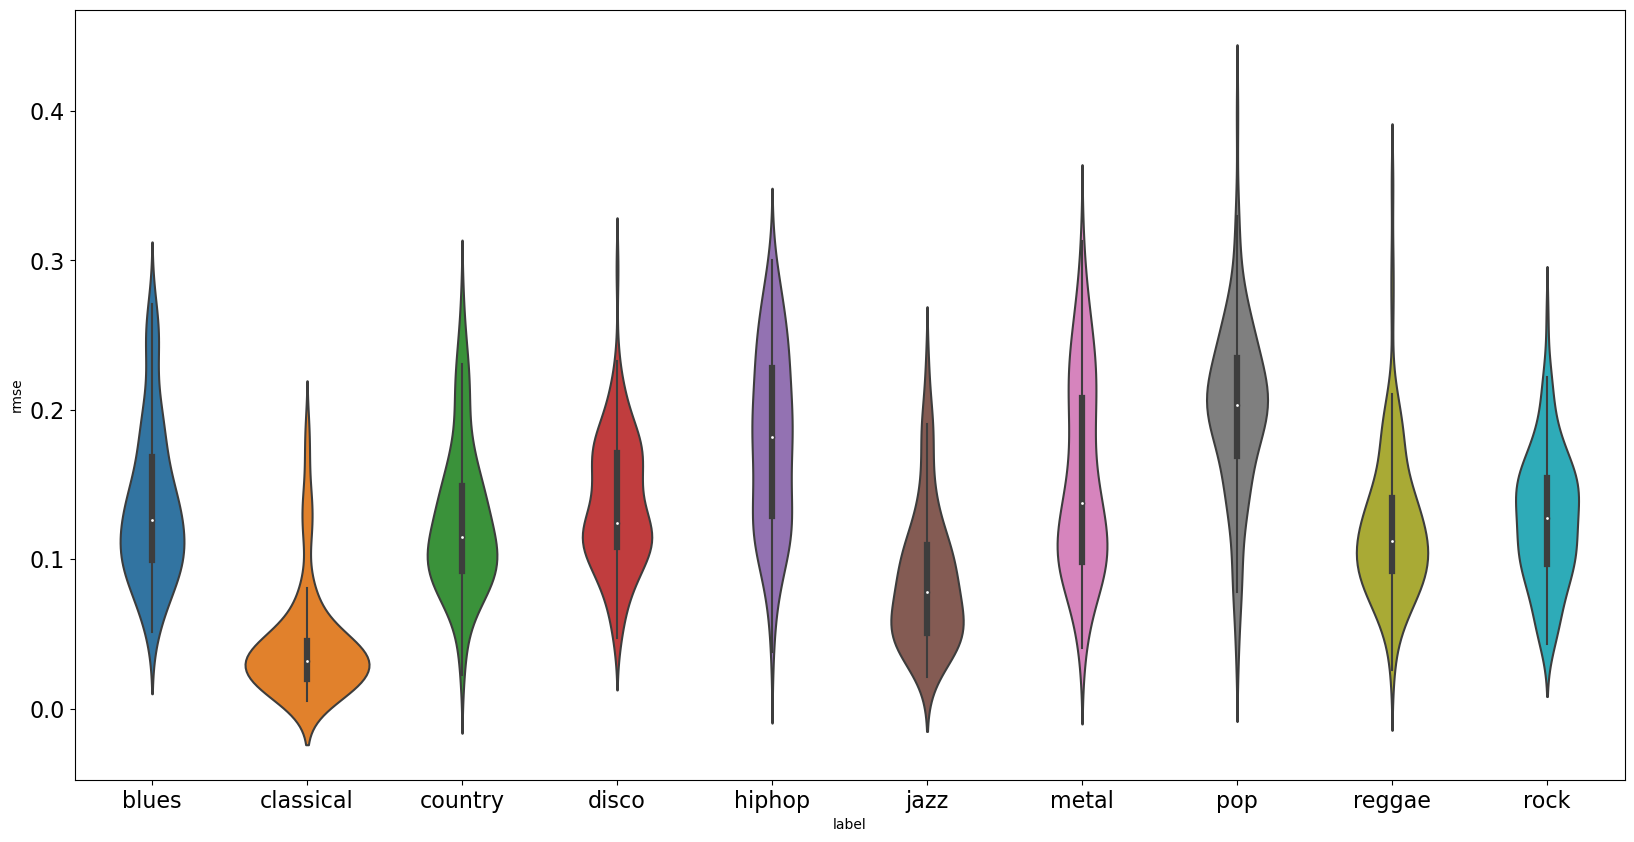

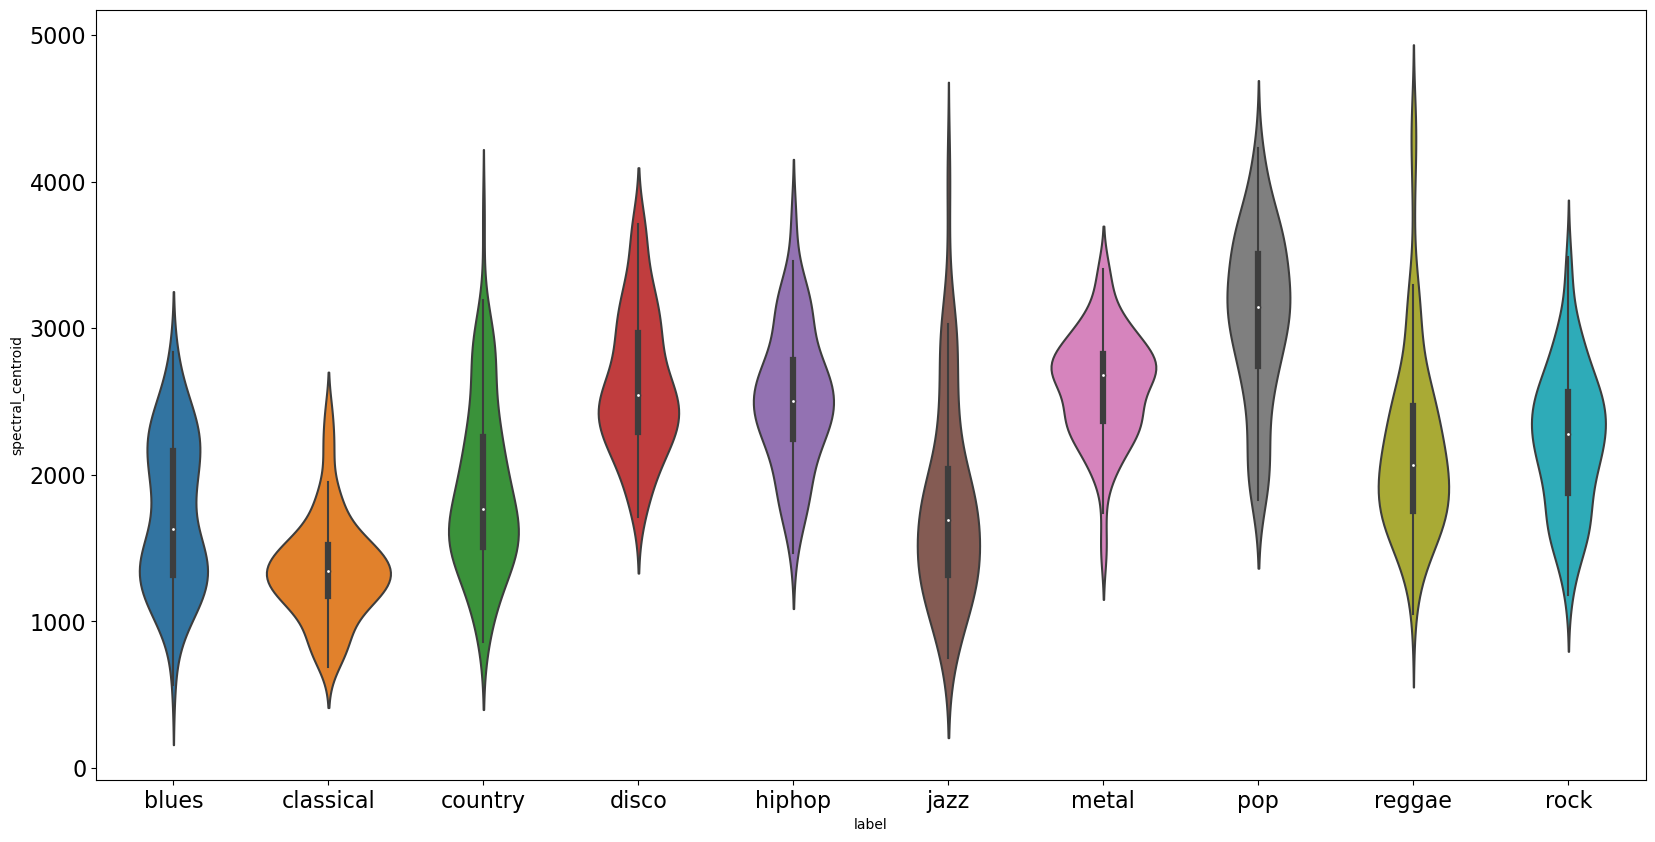

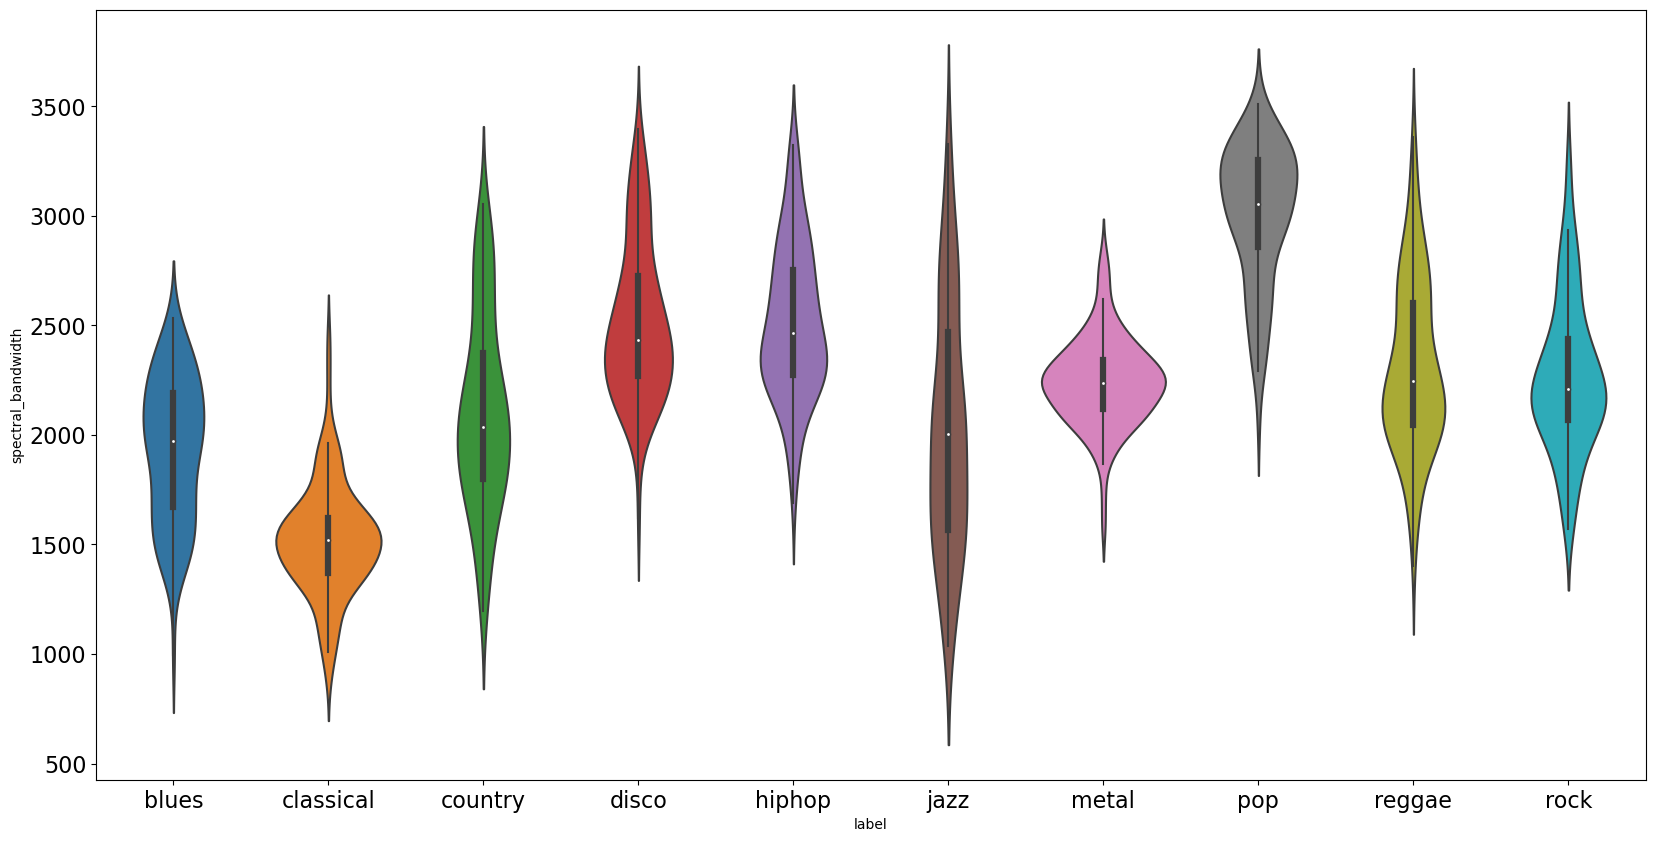

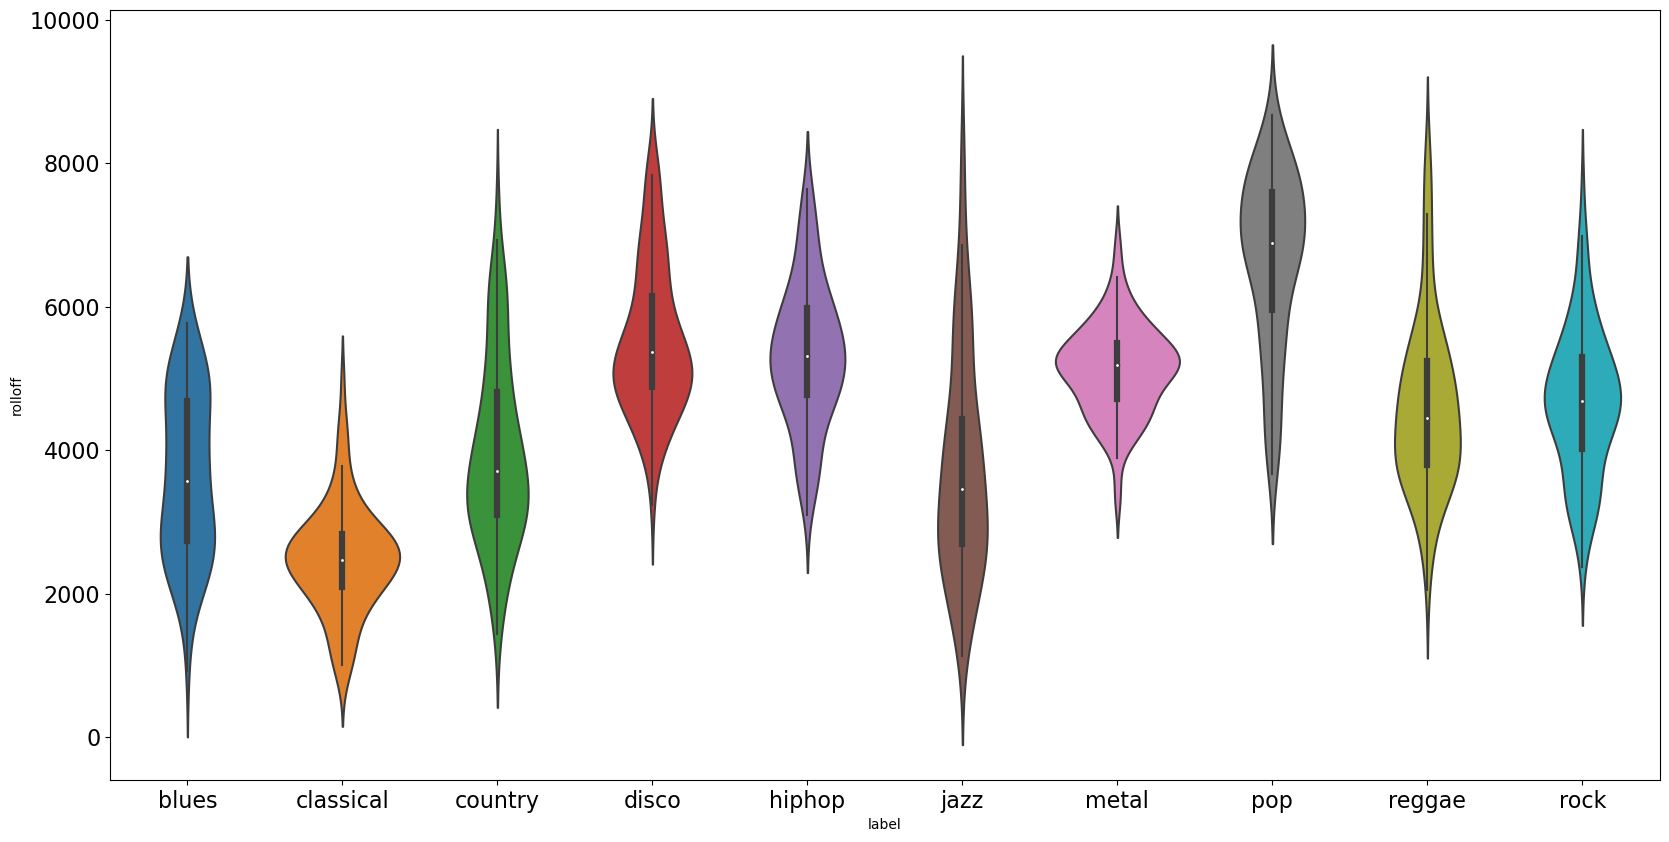

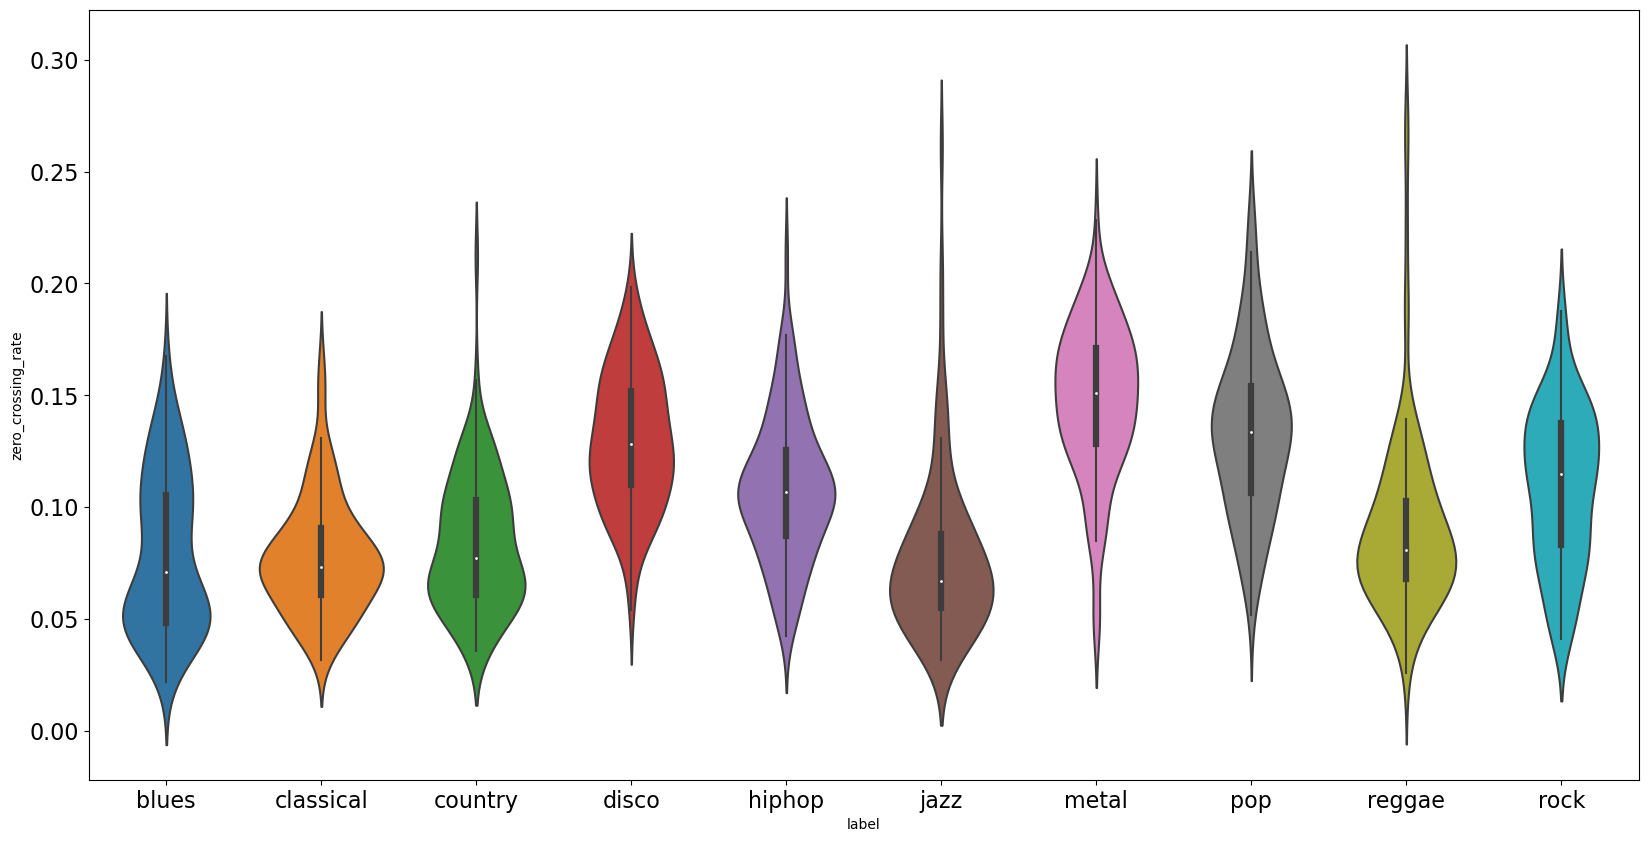

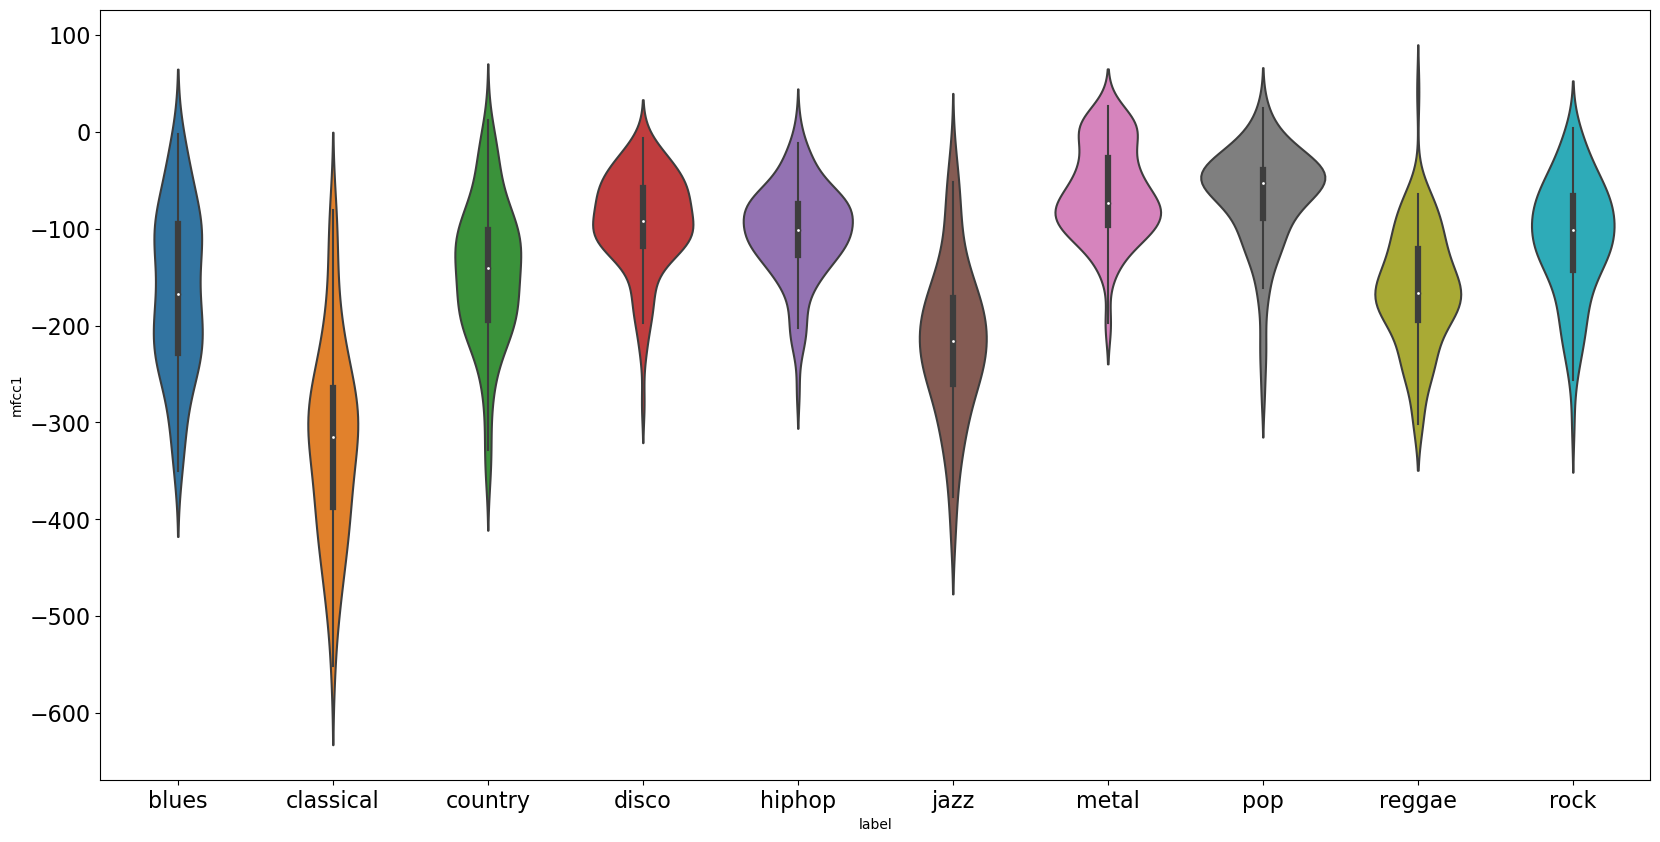

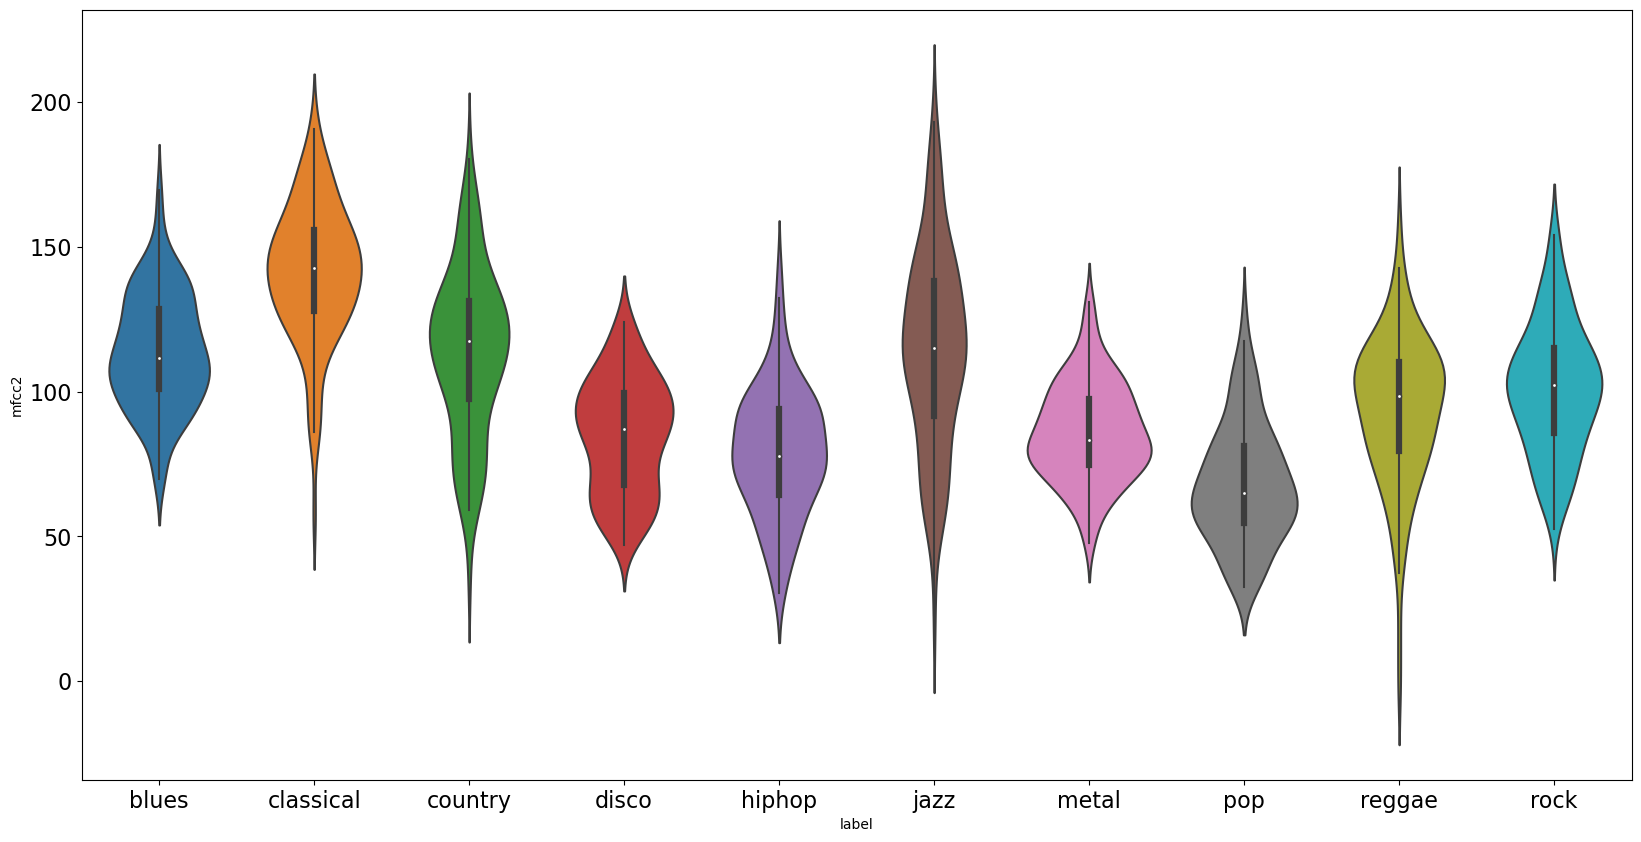

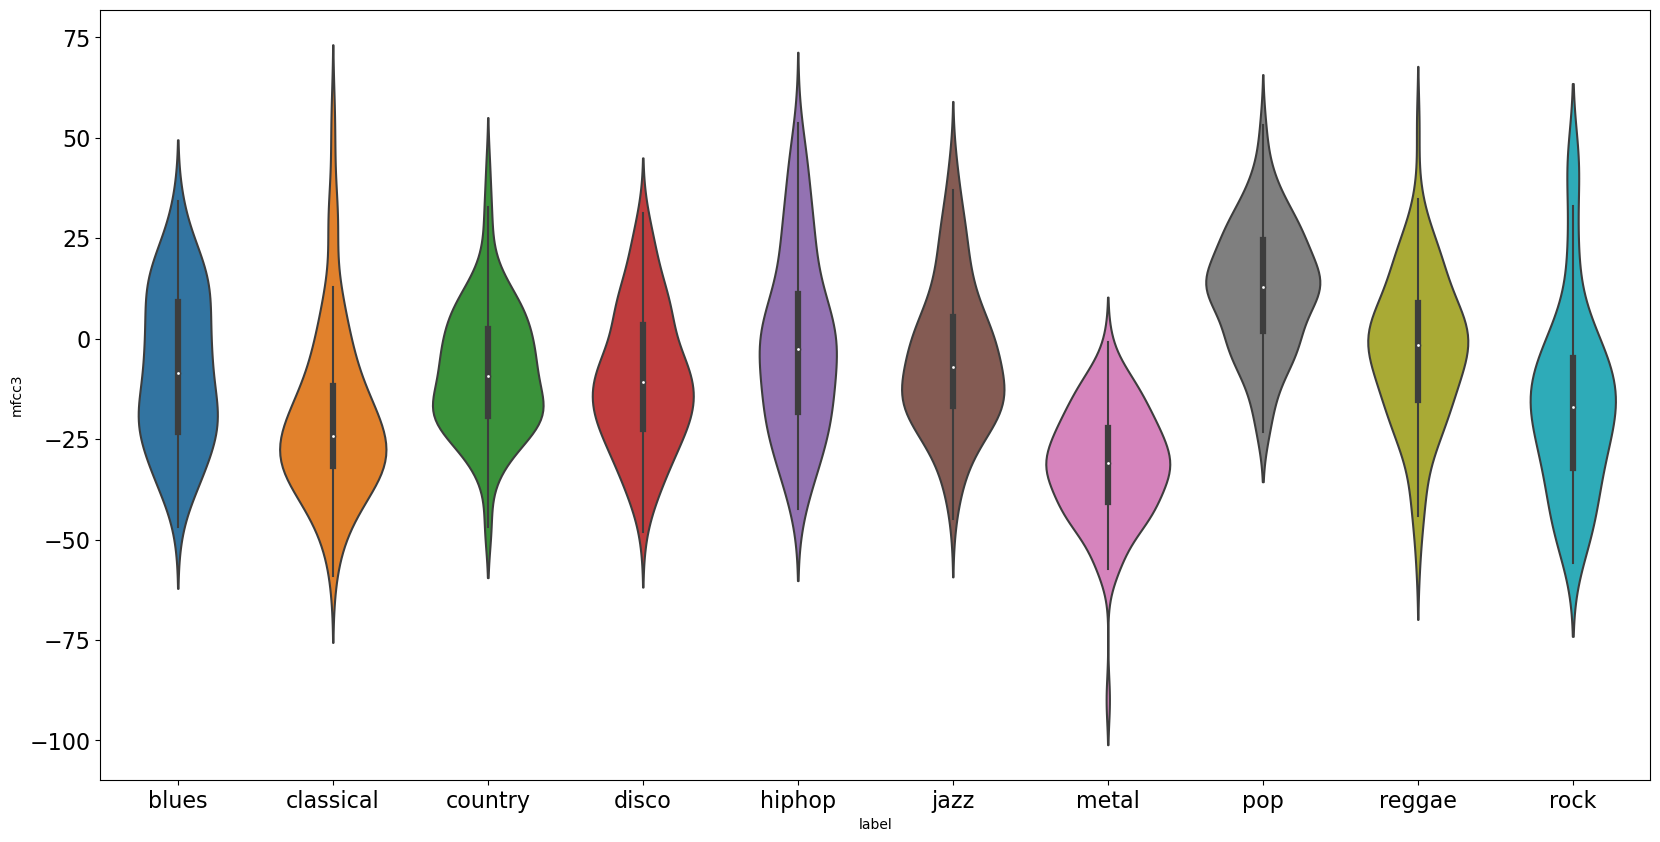

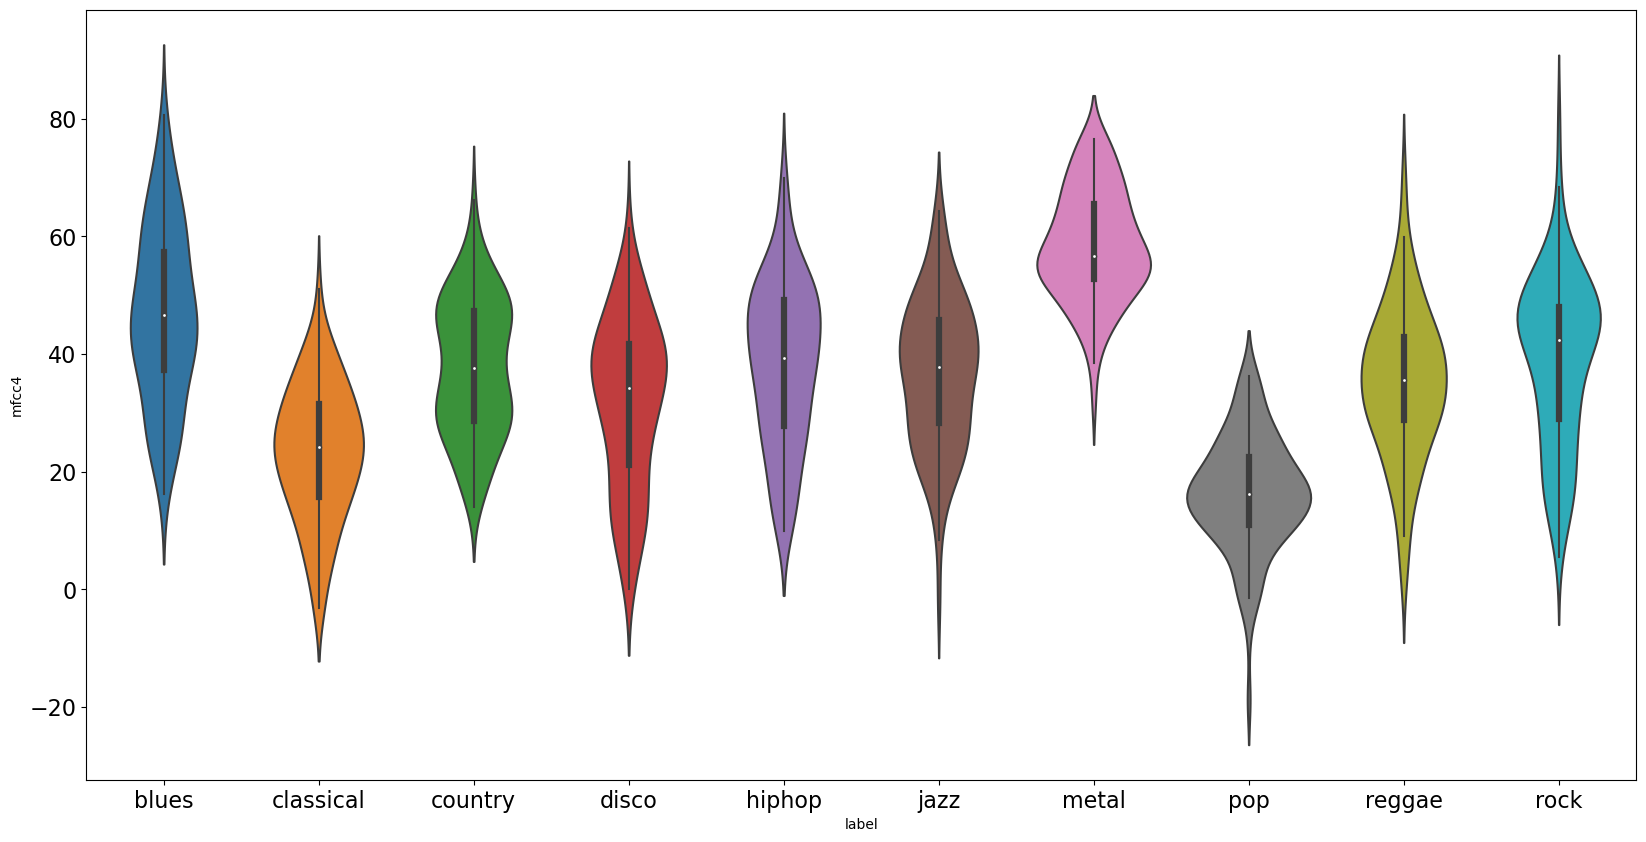

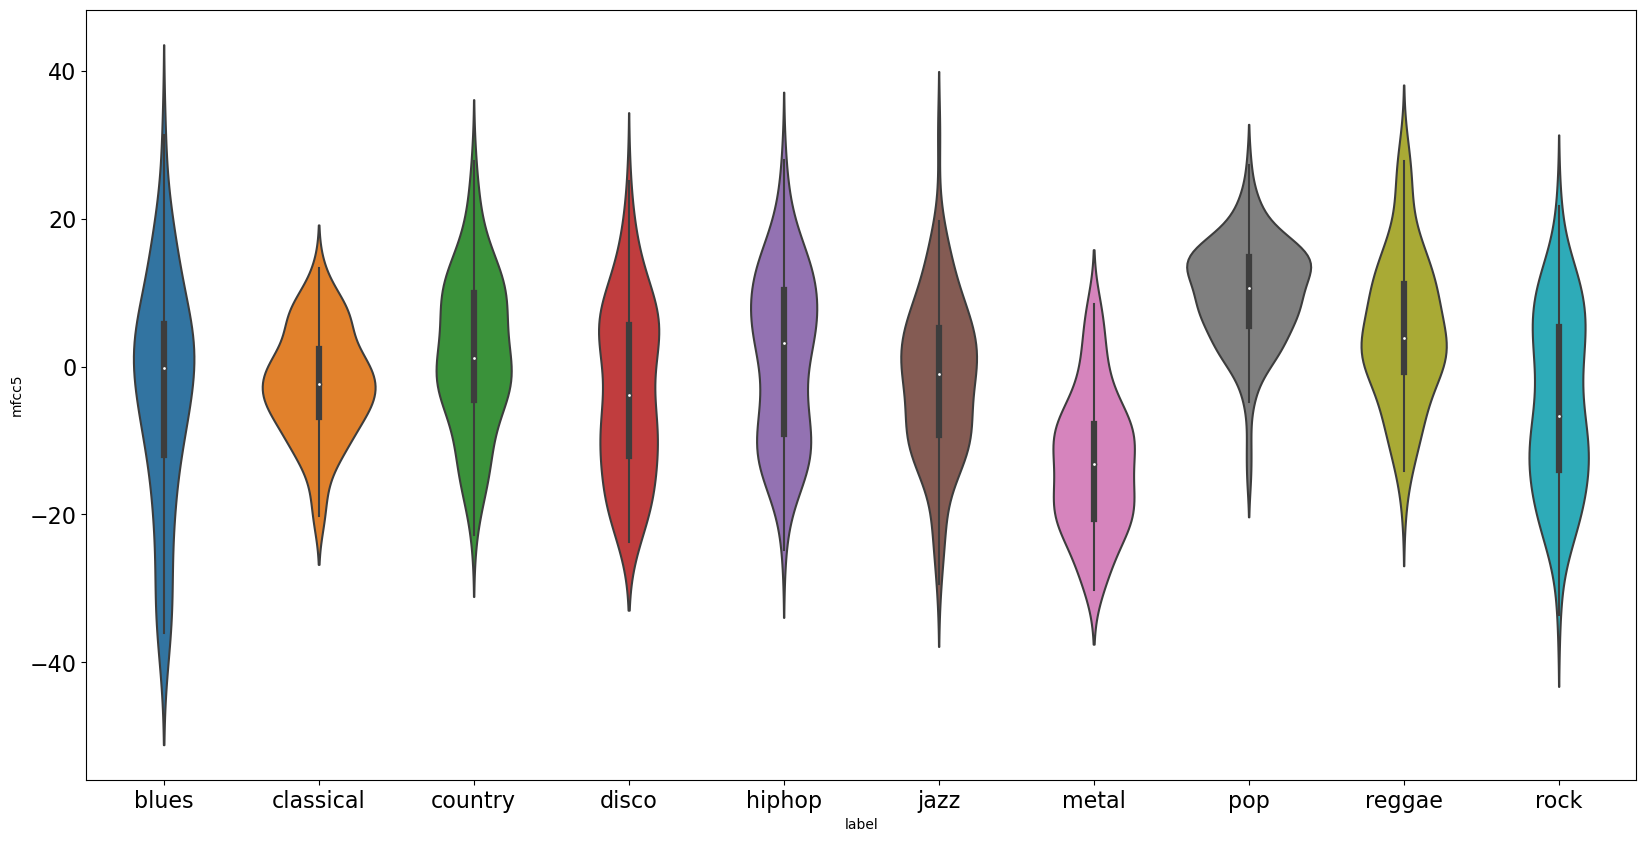

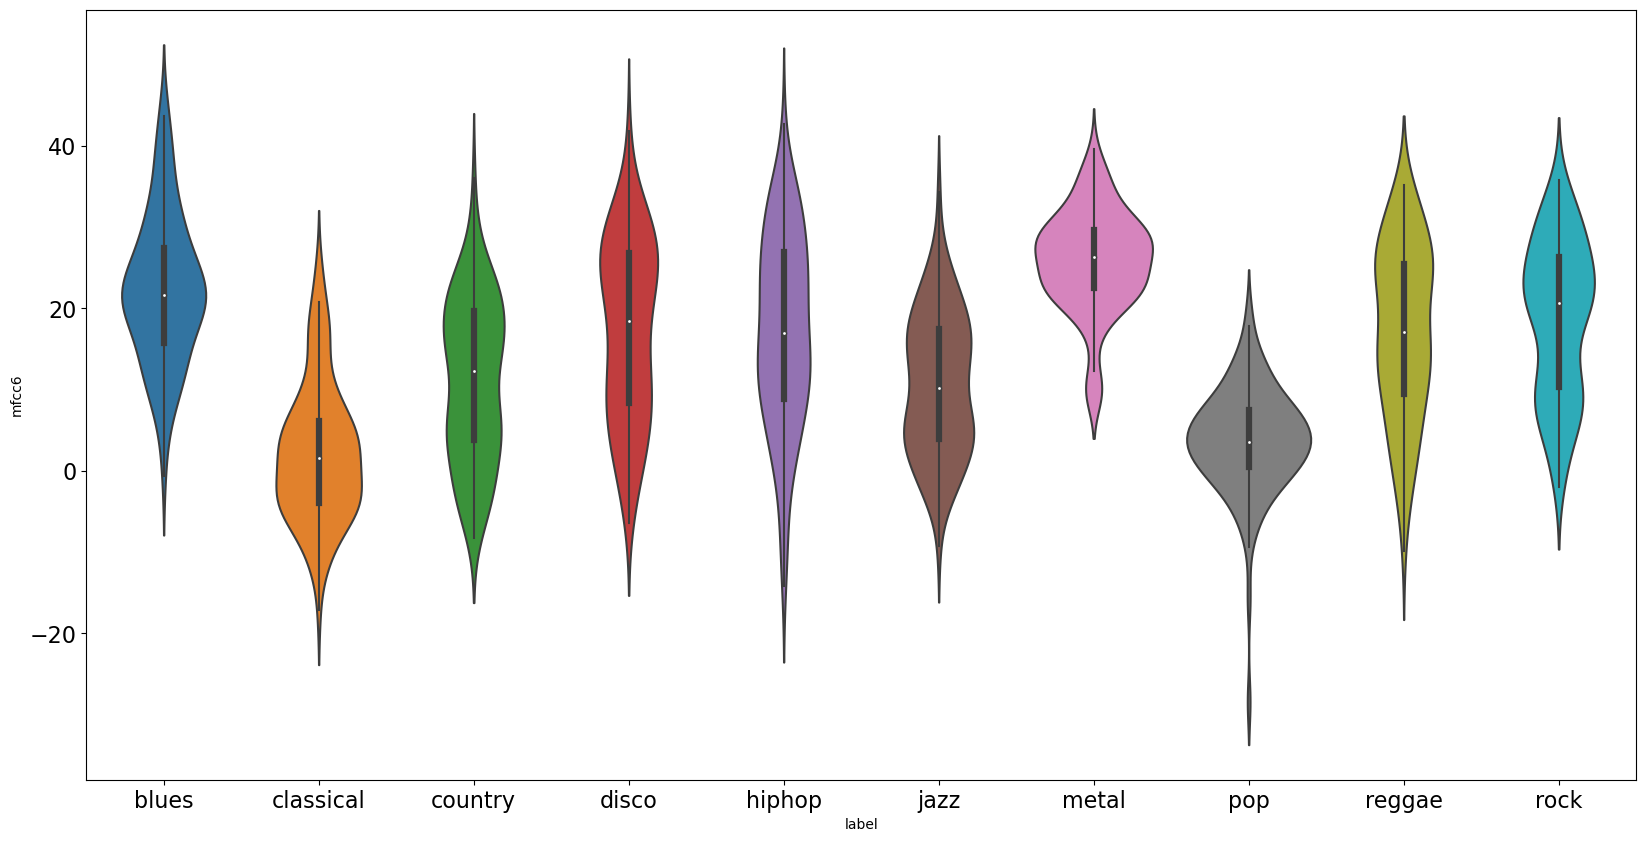

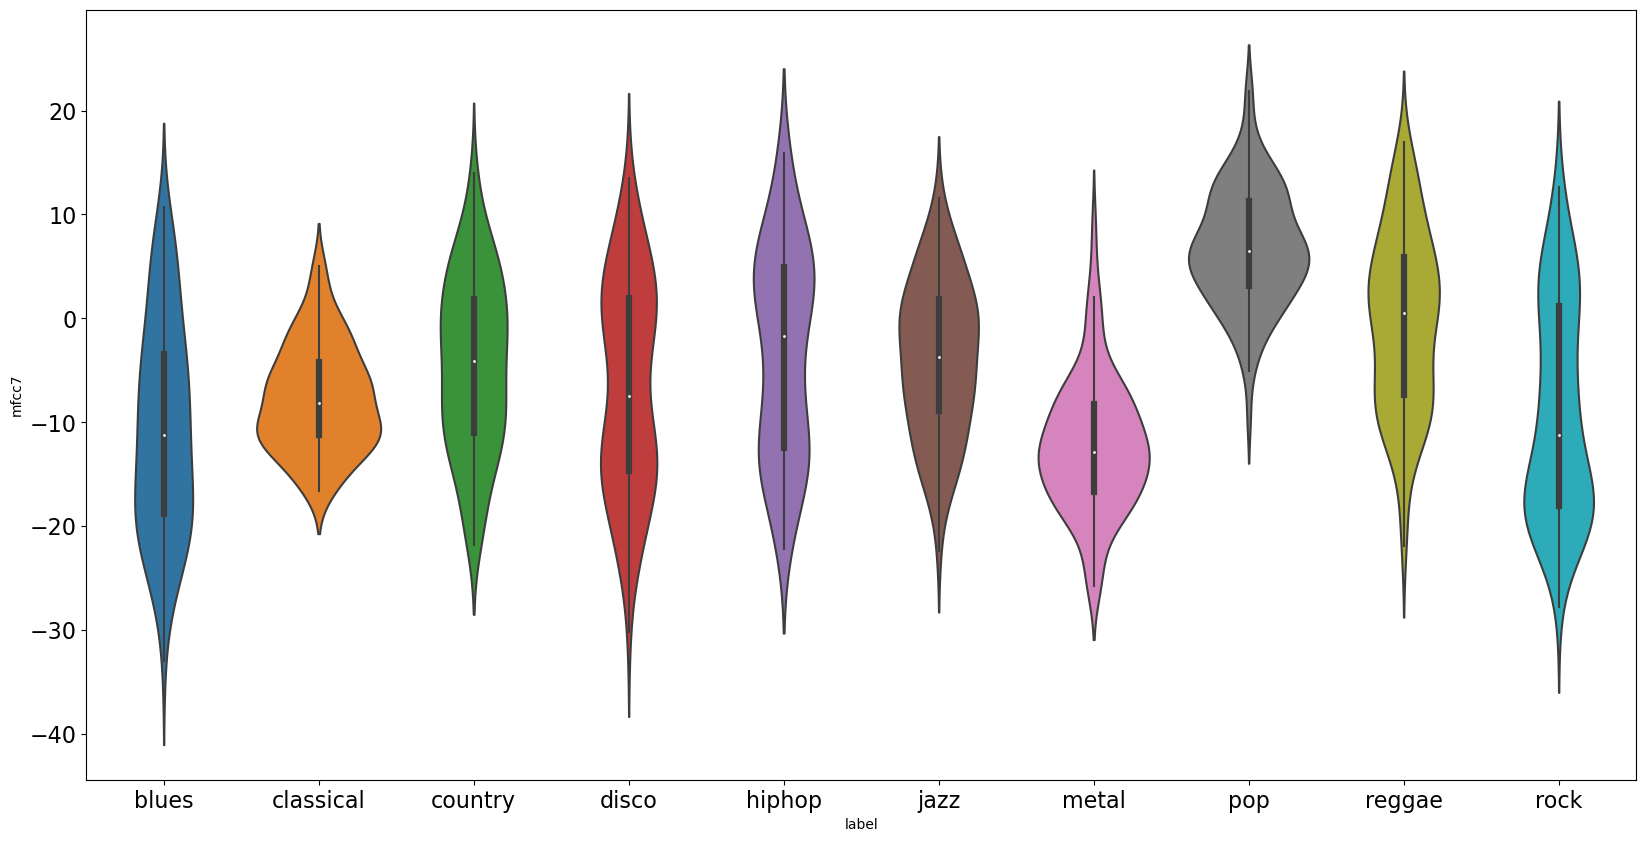

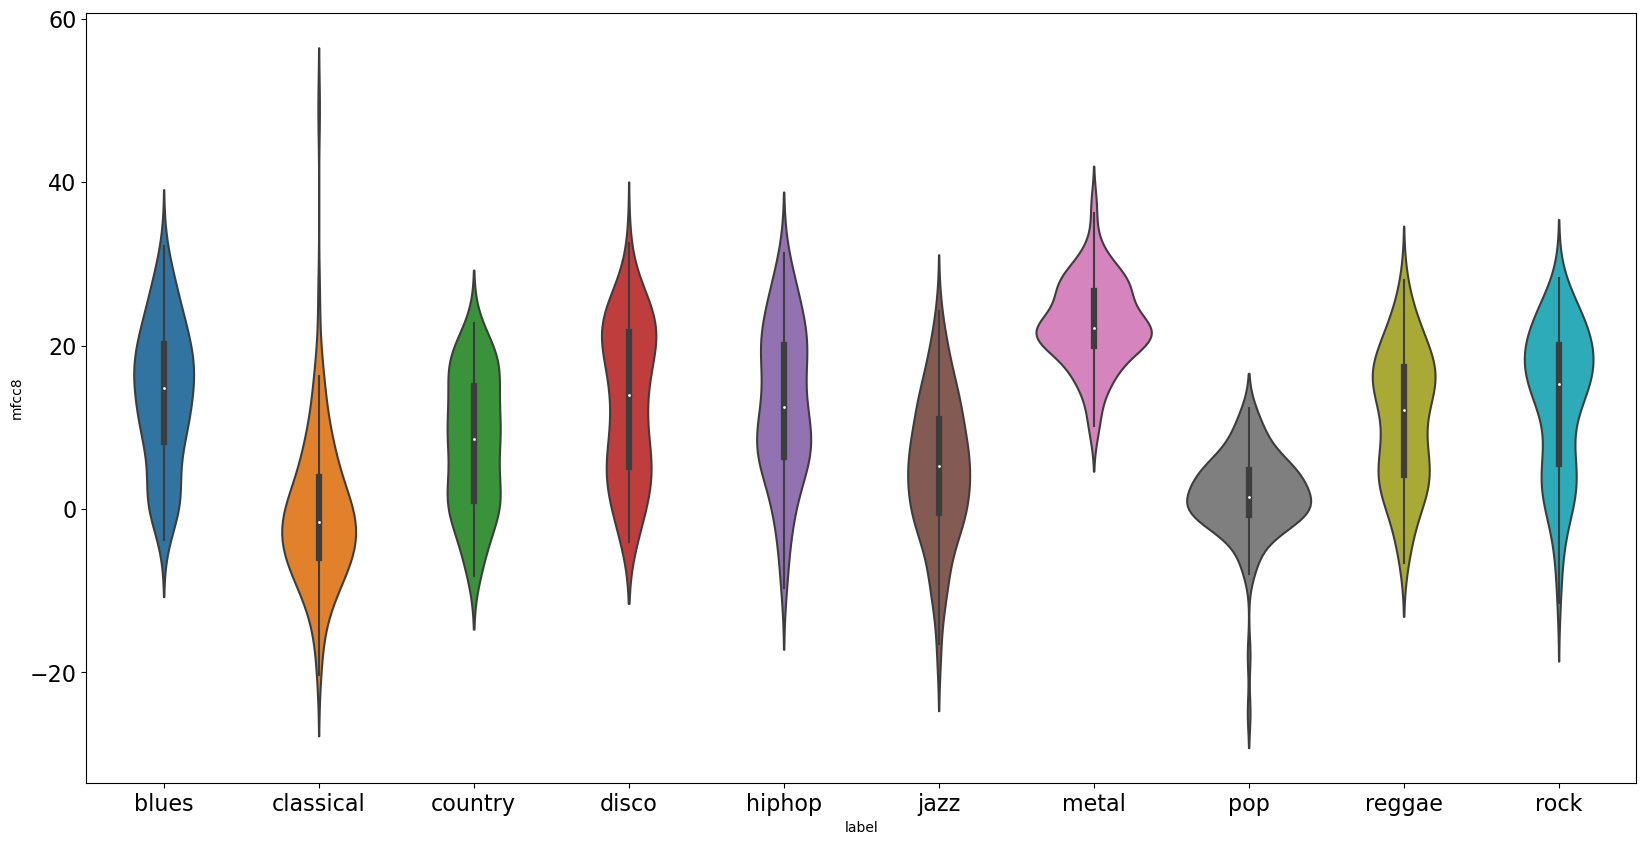

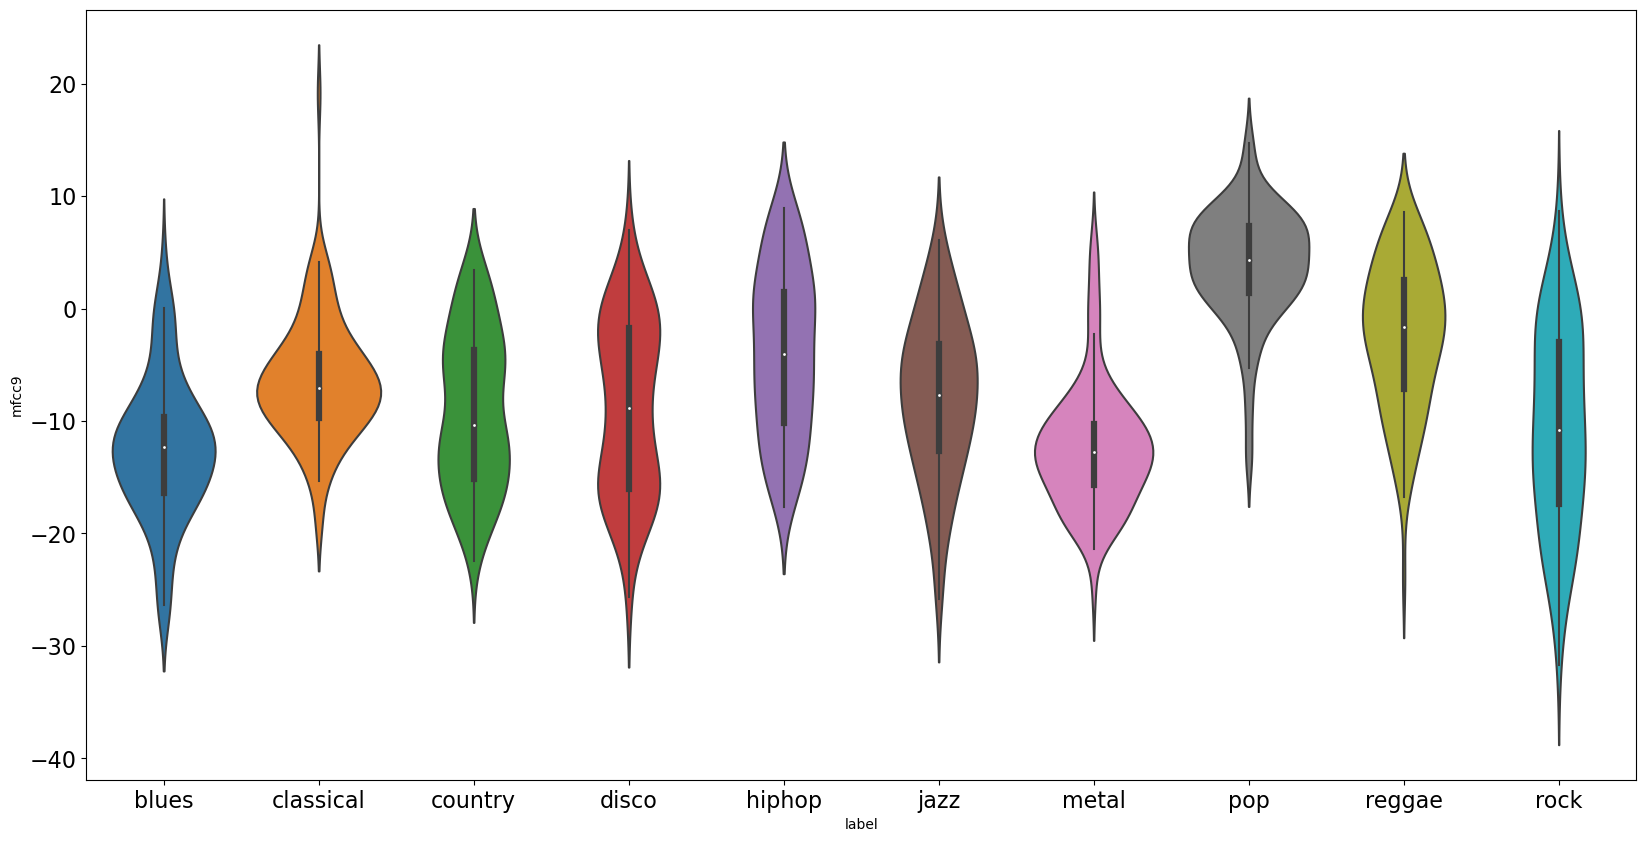

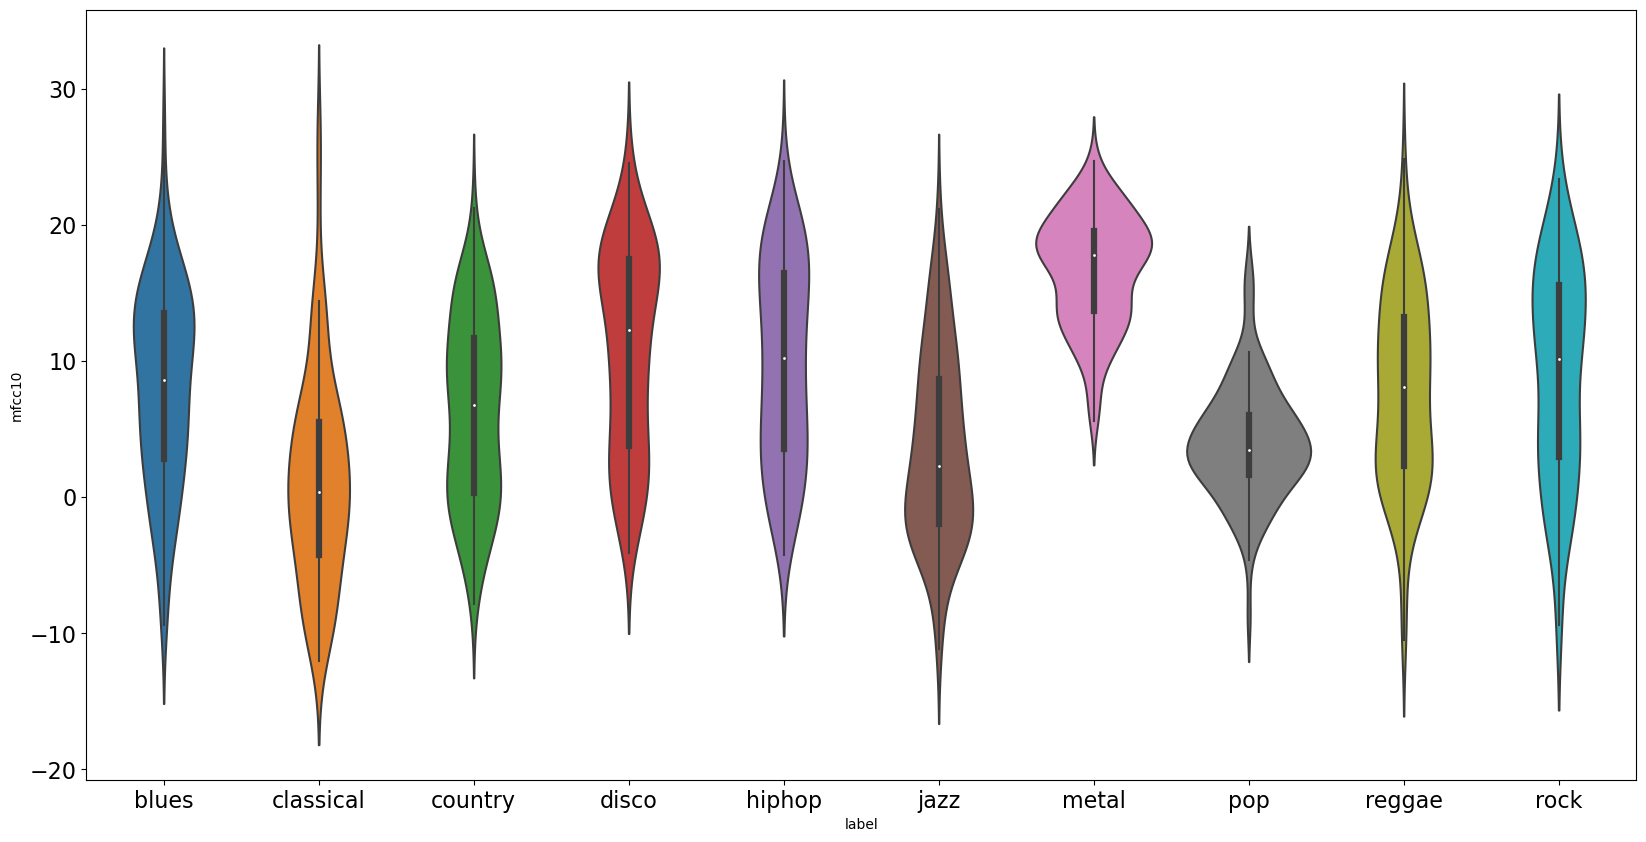

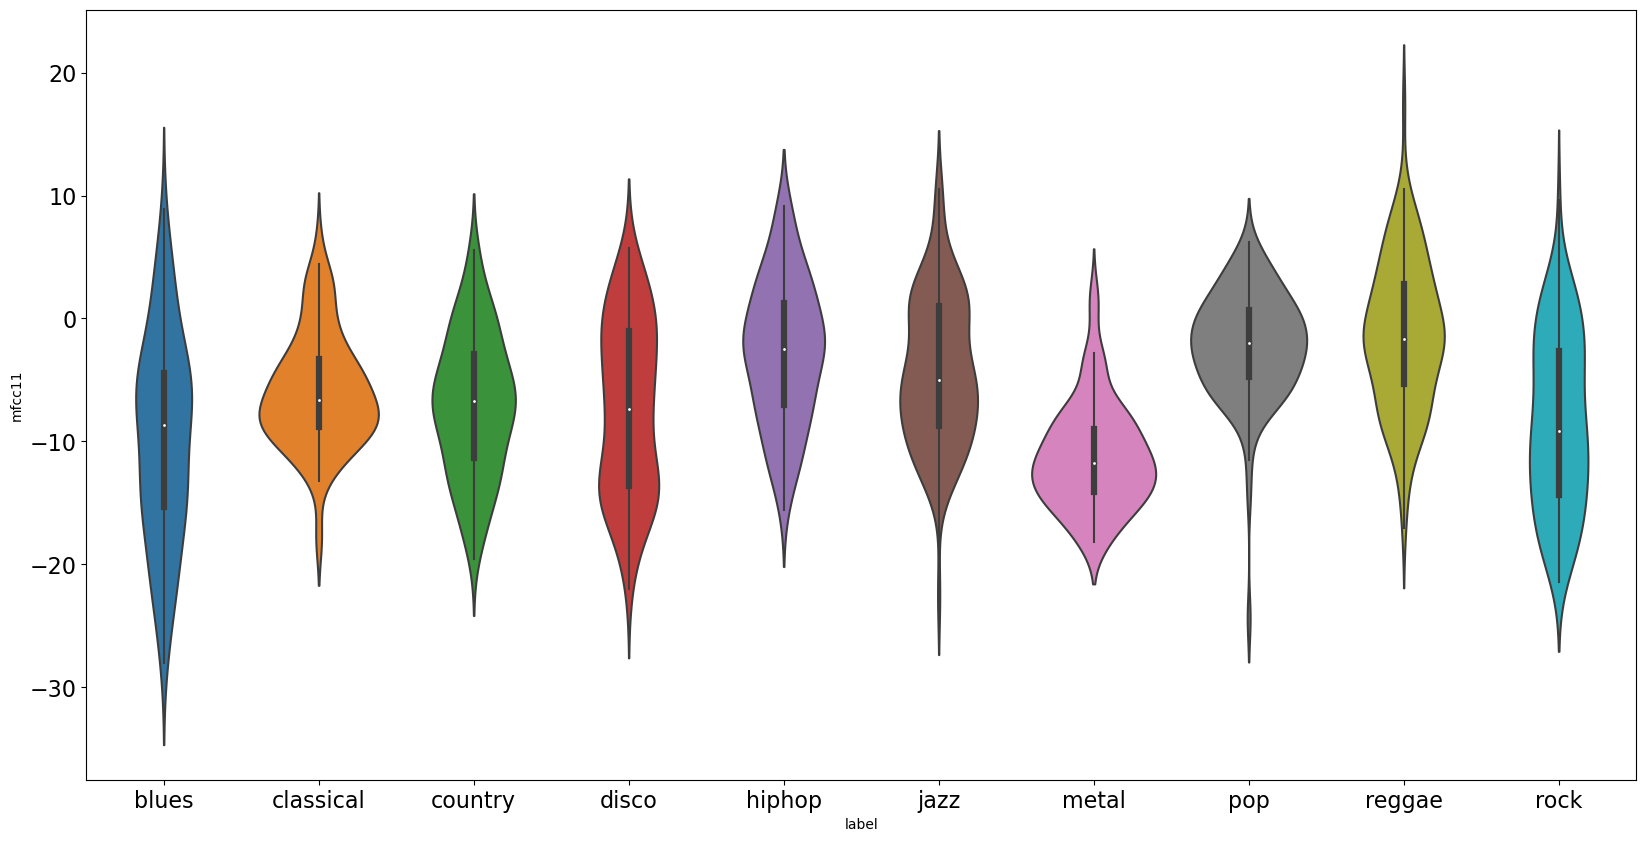

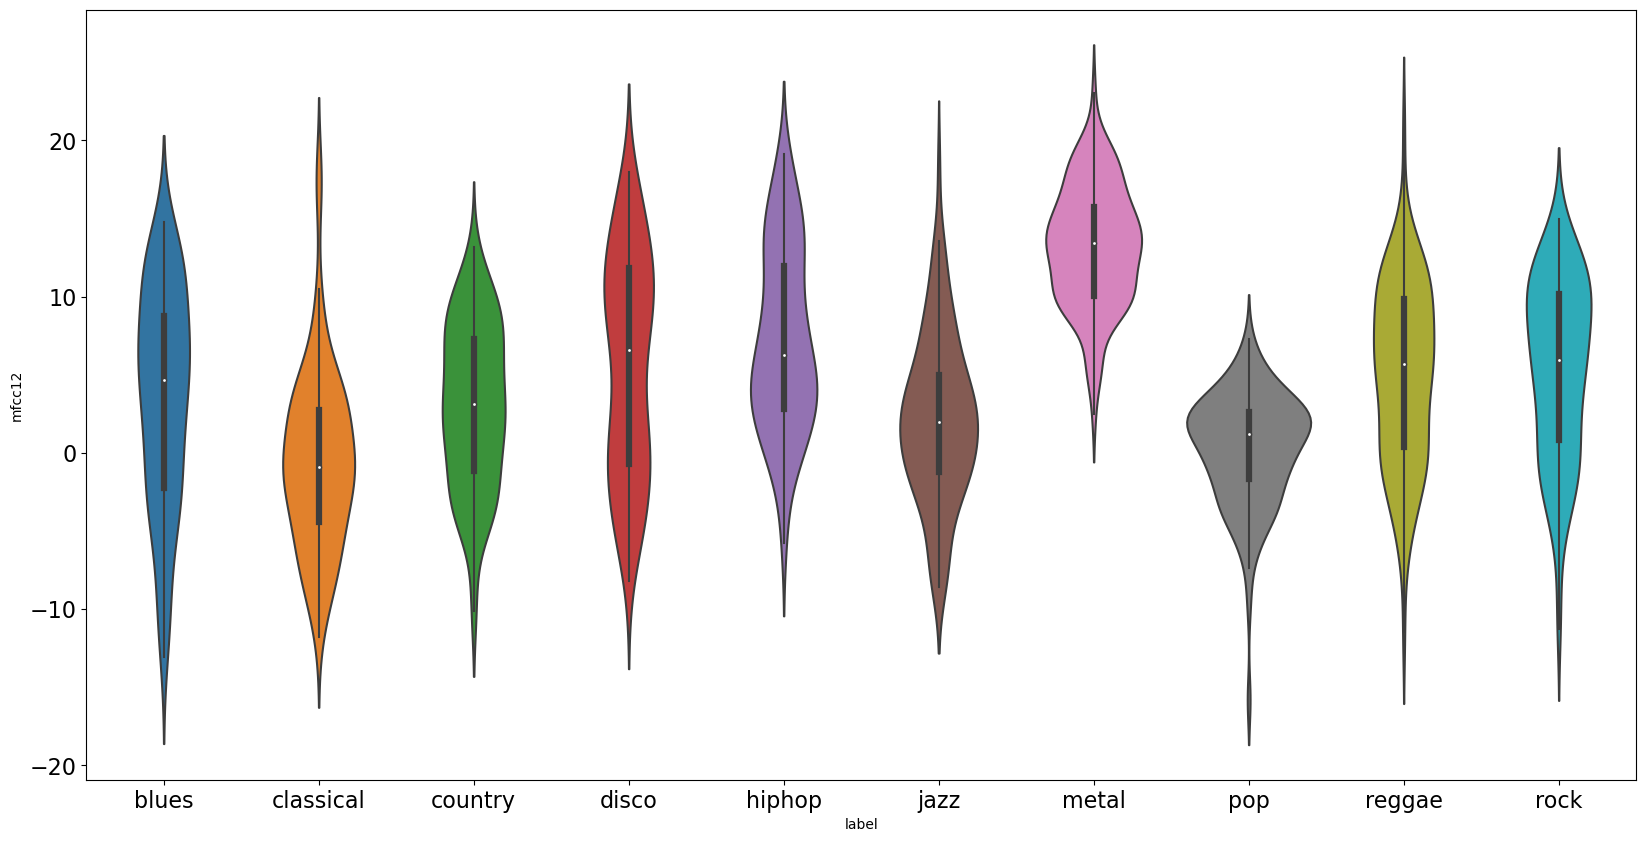

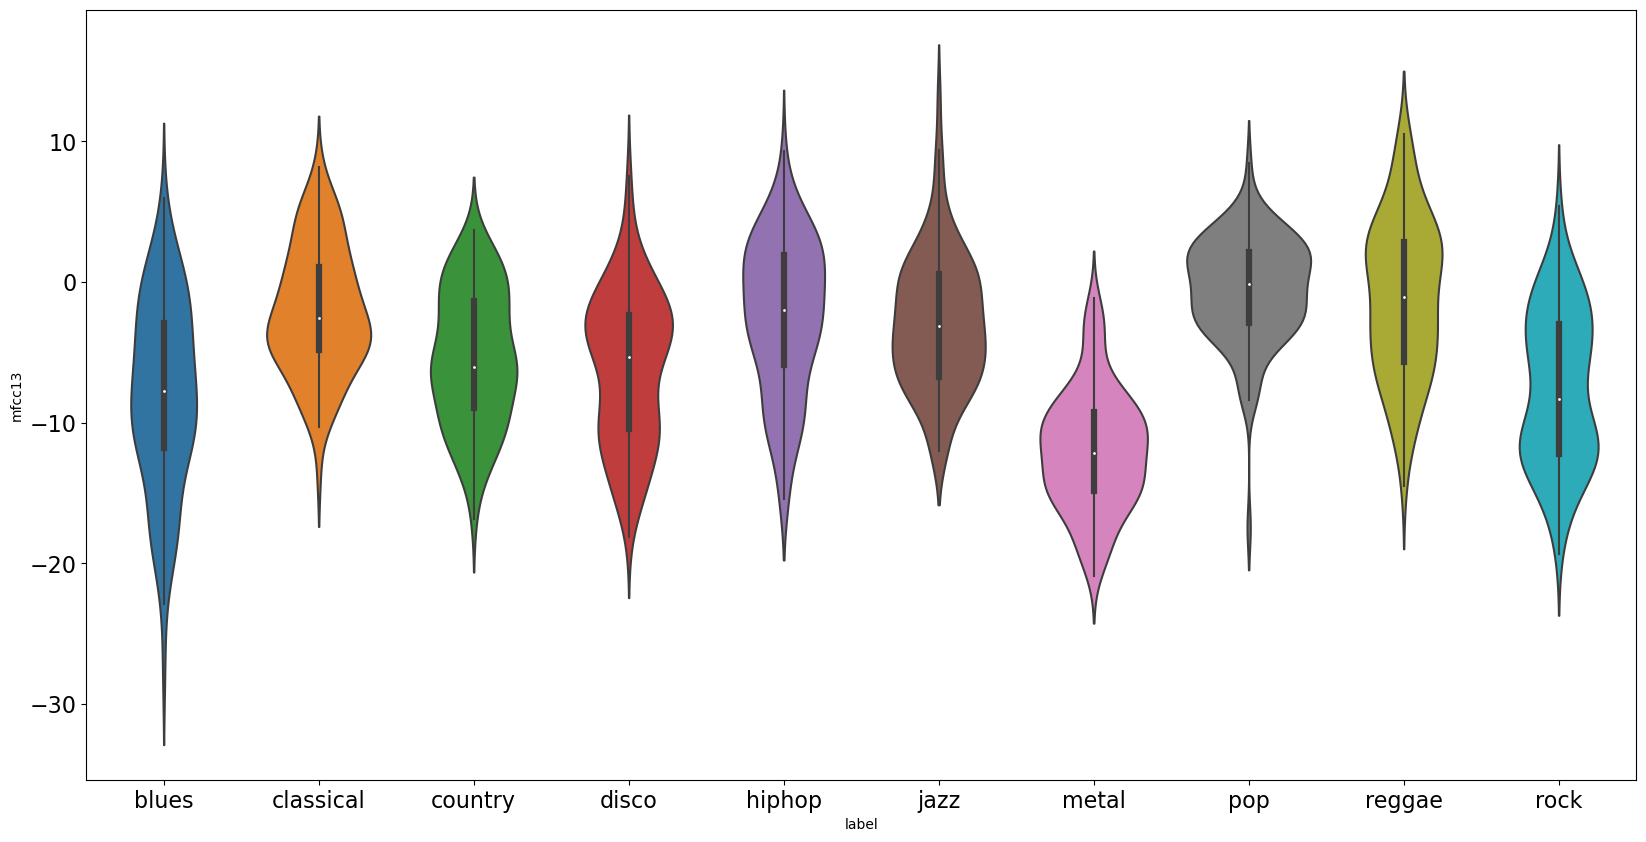

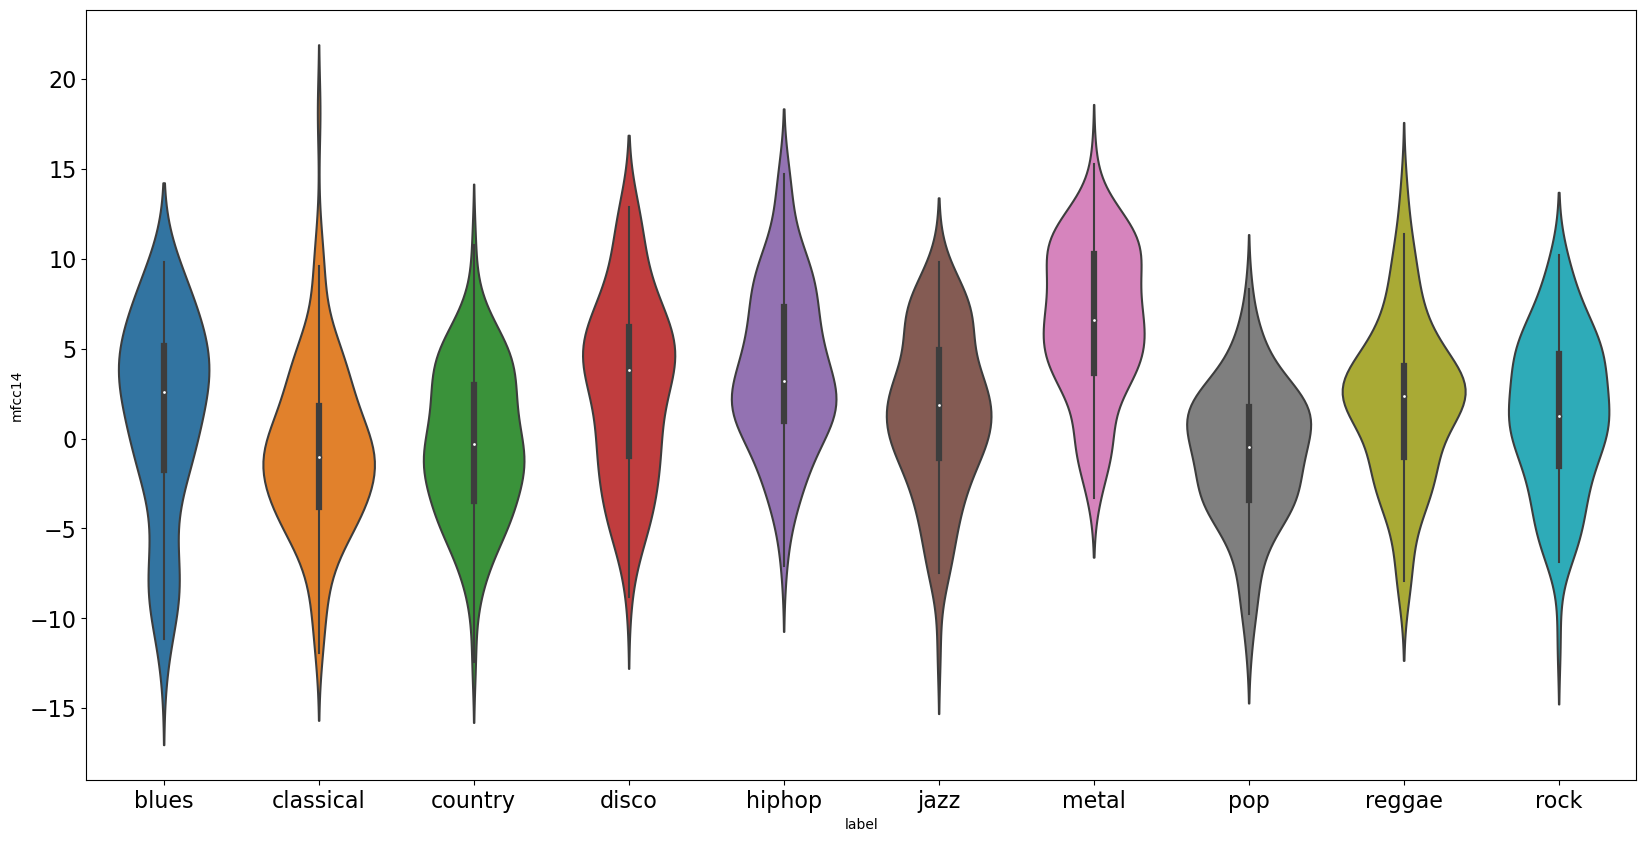

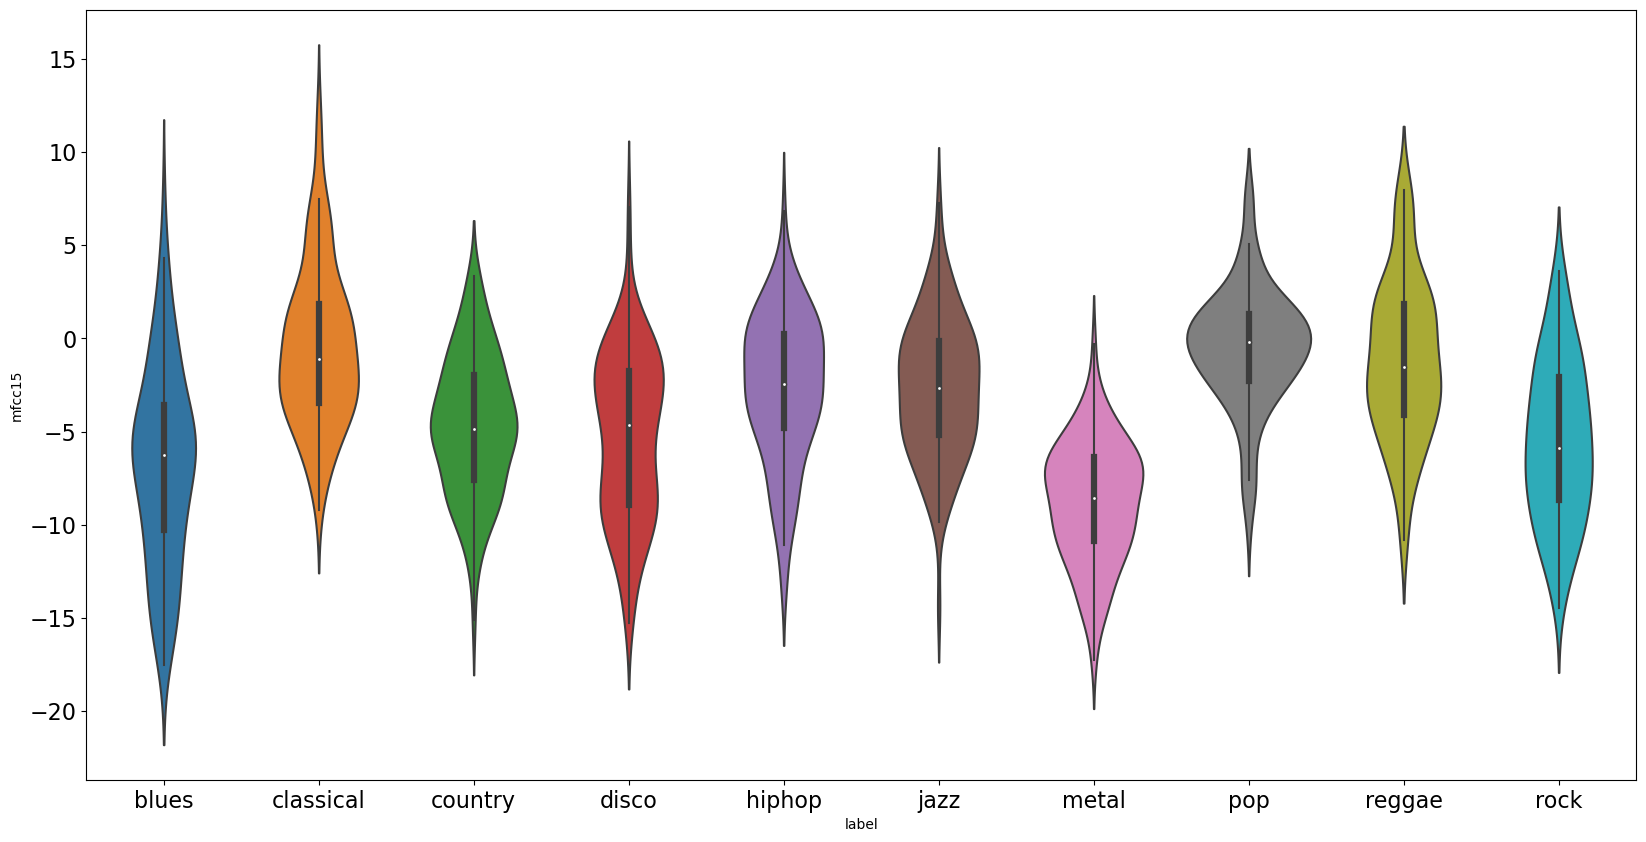

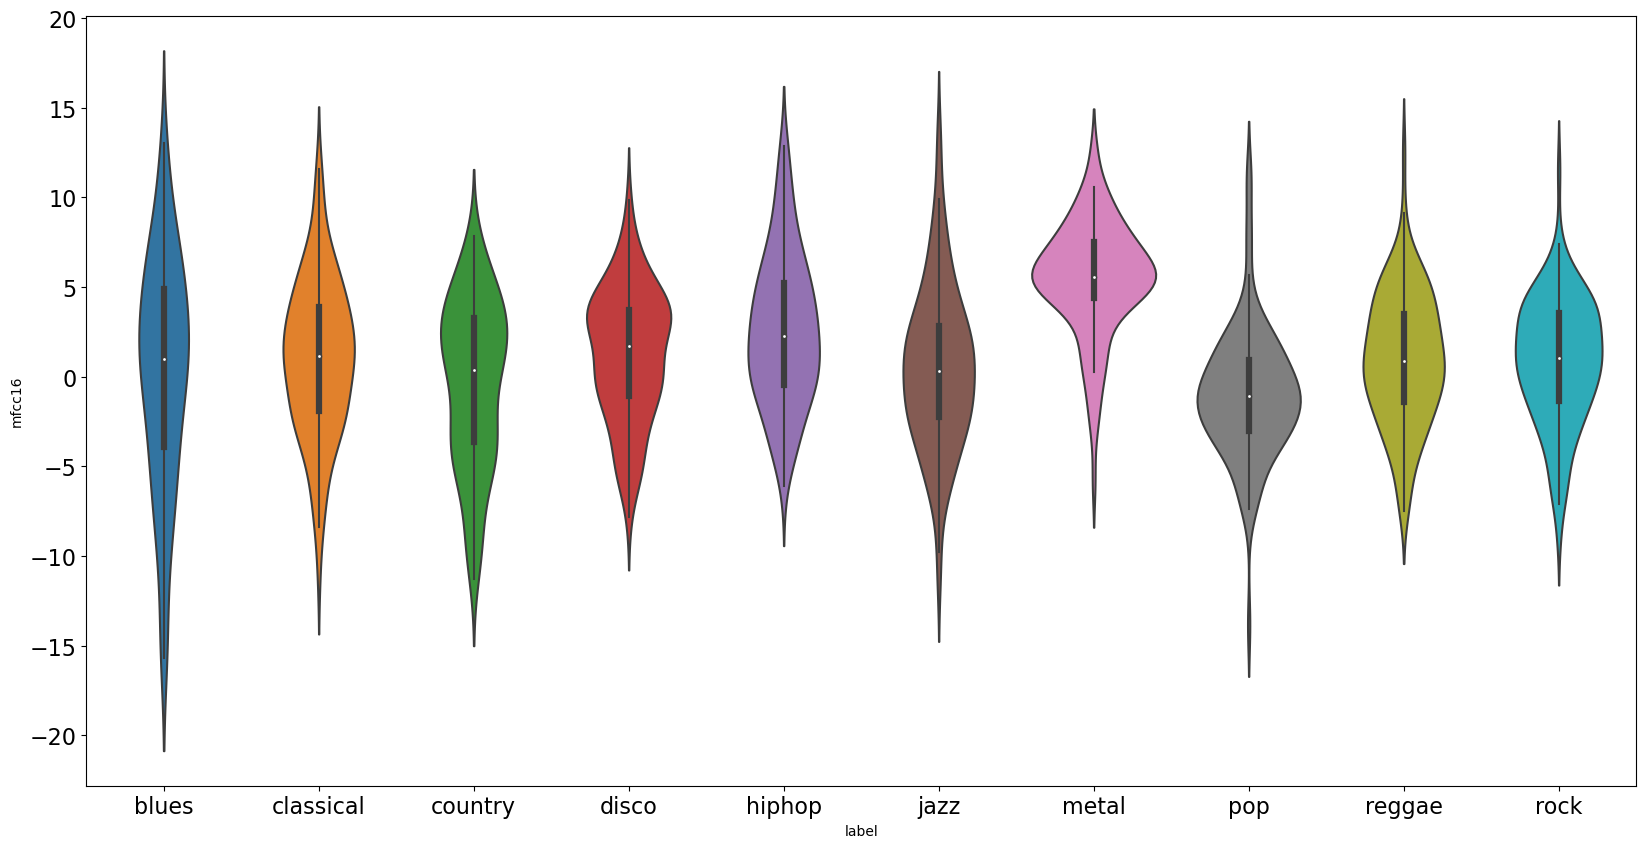

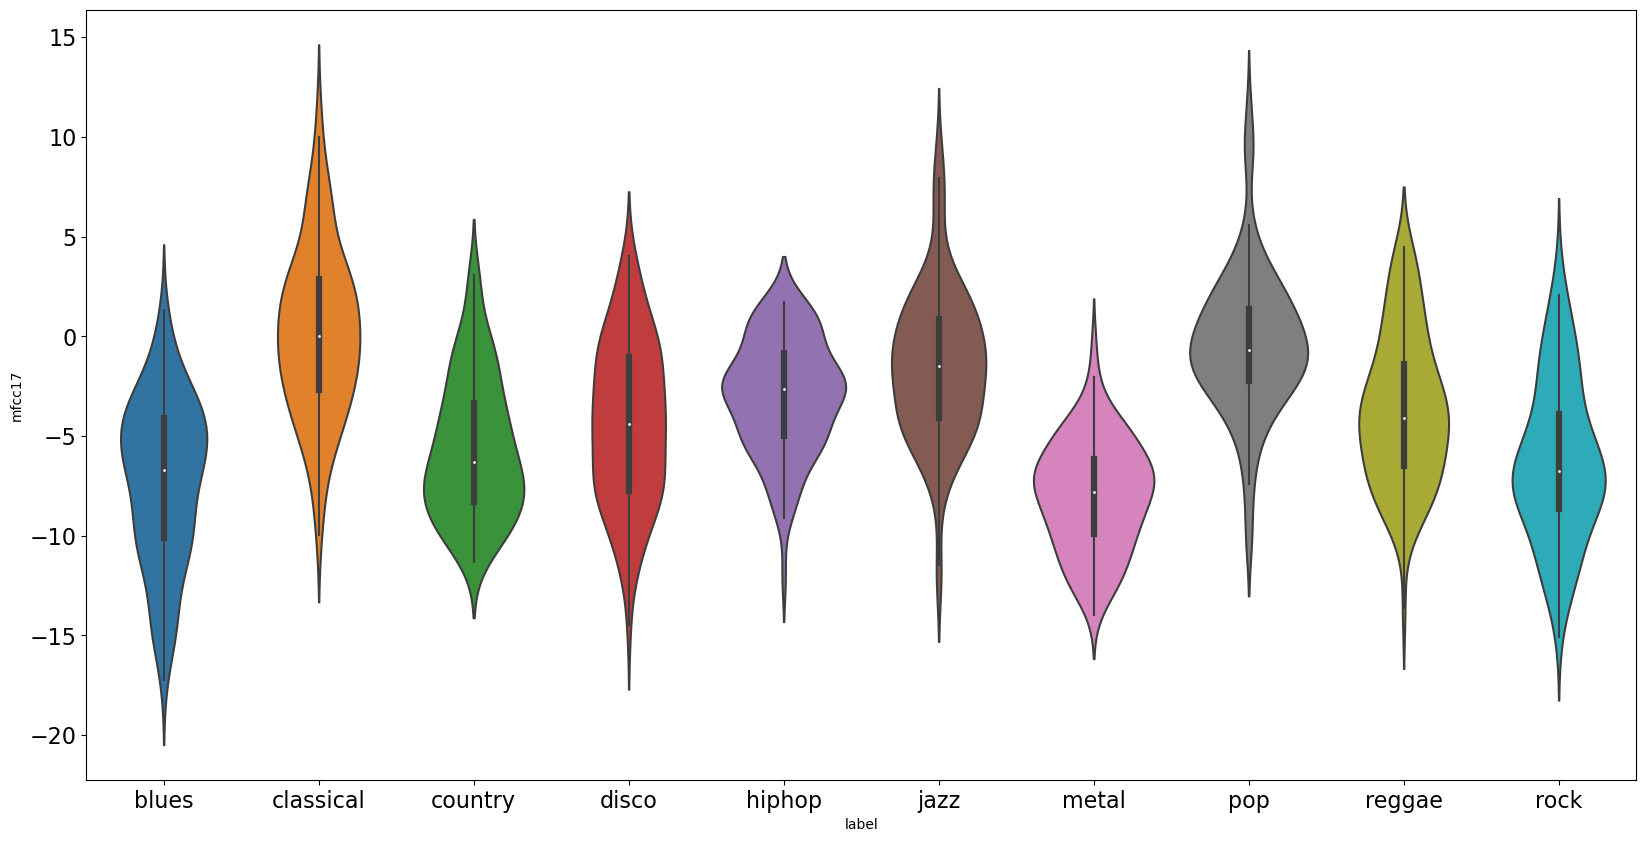

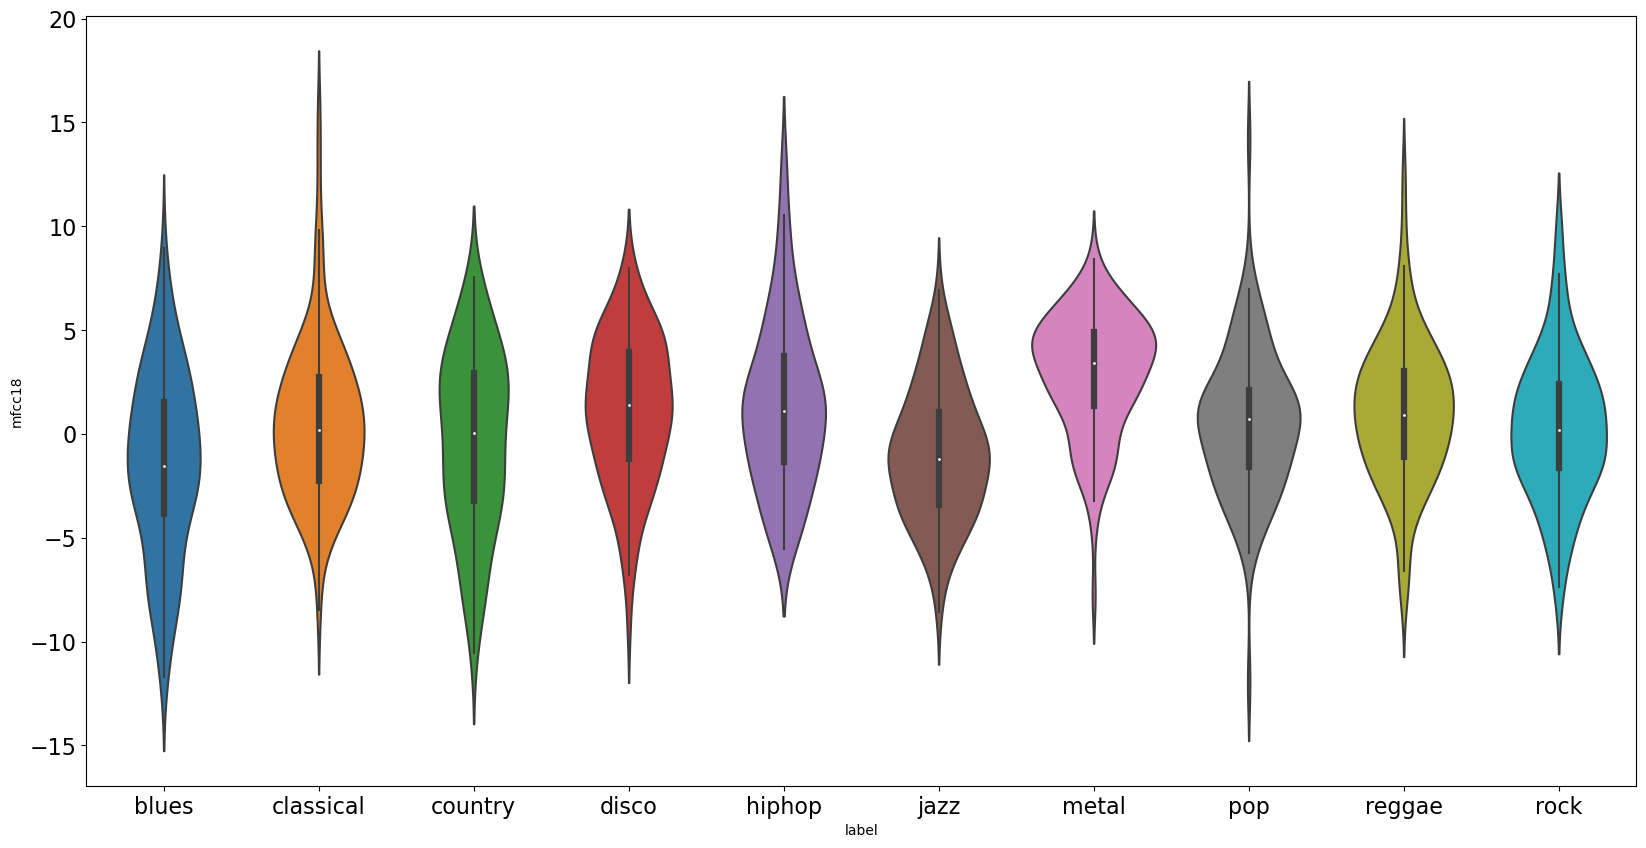

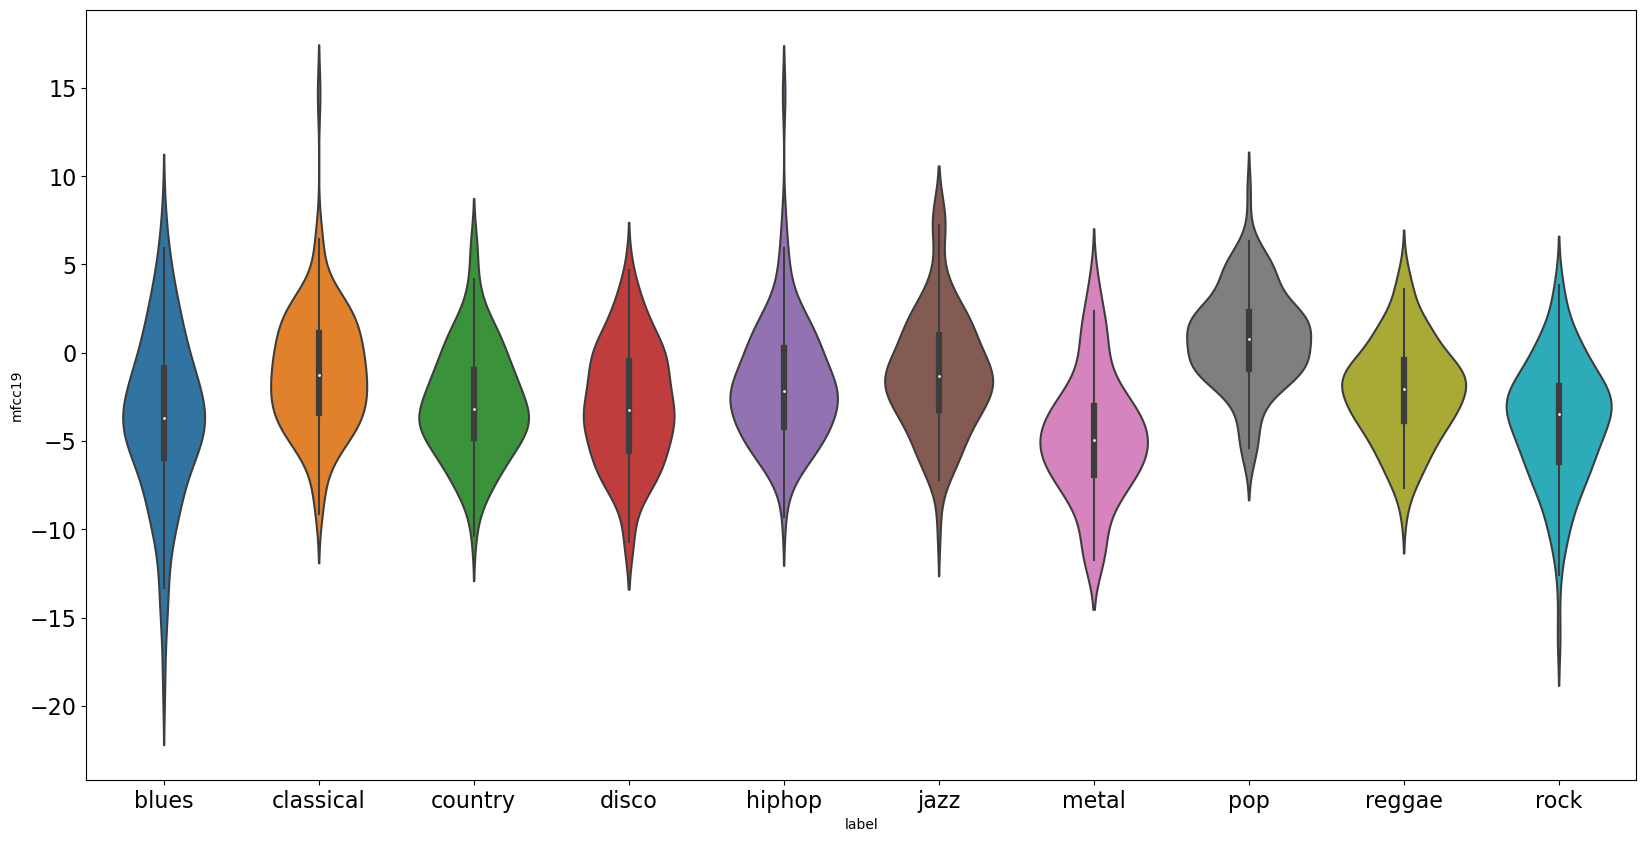

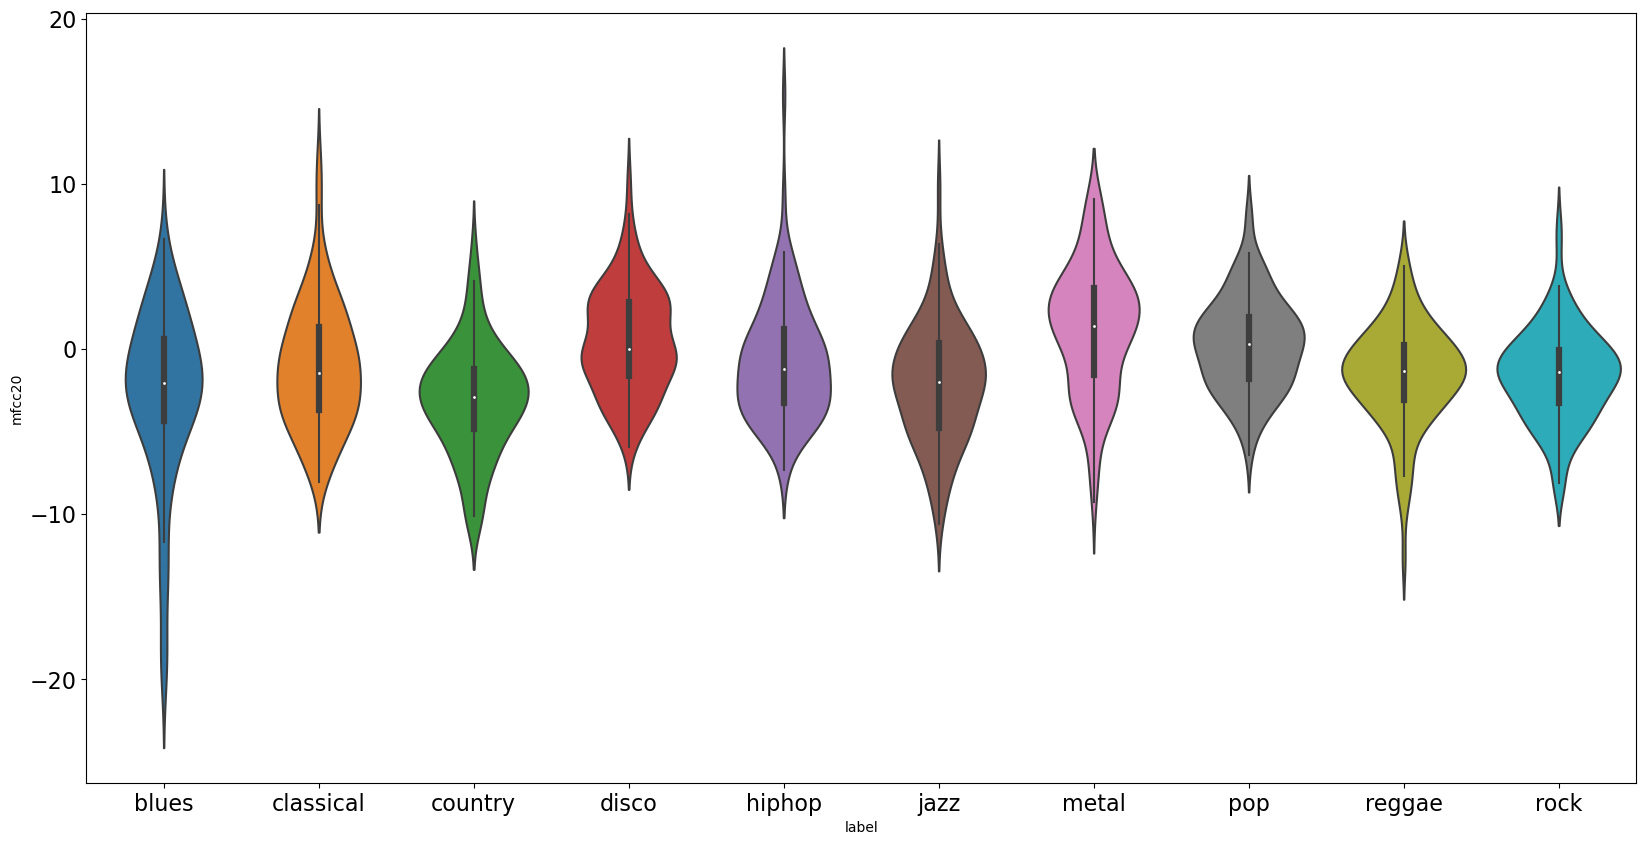

In [48]:
features = list(df1.columns)
features.remove('filename')
features.remove('label')
print(features)

for feat in features:
    fig, ax = plt.subplots(figsize=(20,10))
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    sns.violinplot(data=df1, x='label', y=feat, figsize=(20,10))

In [60]:
X = df1[col2]
y = df1['label']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=2)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.496


In [64]:
y_pred2 = model.predict(df2[col2])
y_pred2

array(['pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'jazz', 'pop', 'pop',
       'rock', 'pop', 'disco', 'disco', 'pop', 'reggae', 'hiphop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'disco', 'country',
       'pop', 'pop', 'hiphop', 'pop', 'pop', 'pop', 'jazz', 'pop', 'pop',
       'pop', 'disco', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'hiphop',
       'pop', 'pop', 'pop', 'pop', 'blues', 'jazz', 'hiphop', 'jazz',
       'pop', 'pop', 'pop', 'pop', 'jazz', 'reggae', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'disco', 'pop', 'country', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'rock', 'pop', 'pop', 'pop',
       'pop', 'disco', 'country', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'country', 'pop', 'pop', 'pop', 'disco', 'pop',
       'pop', 'pop', 'pop', 'pop', 'rock', 'rock', 'pop', 'jazz',
       'classical', 'classical', 'classical', 'classical', 'classical',
       'classical', 'classical', 'classical', 'classical', 'classical',
     

In [65]:
print("Accuracy of Prediction is", accuracy_score(y_pred2, df2['label']))

Accuracy of Prediction is 0.815


In [43]:
import pickle
filename = 'model.pkl'

# Dump the model using pickle
with open(filename, 'wb') as file:
    pickle.dump(model, file)